# Сегментация пользователей для регионального банка

__Цель исследования:__ проанализировать клиентов регионального банка и сегментировать пользователей по количеству потребляемых продуктов и оттоку

__Описание данных:__

`bank_scrooge.csv`

Колонки:

- `USERID` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город (Ярославль, Ростов, Рыбинск)
- `gender` — пол,
- `age` — возраст,
- `equity` — количество баллов собственности
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта (0 - нет / 1 - да),
- `last_activity` — активный клиент,
- `EST_SALARY` — оценочный доход клиента,
- `сhurn` — признак оттока (1 - уходит / 0 - не уходит)

__Задачи:__

1. Загрузка и предобработка данных

- заменить названия столбцов (привести к нижнему регистру);
- обработать пропуски при наличии;
- обработать дубликаты при наличии;
- добавление дополнительных колонок

2. Исследовательский анализ данных 

- сформировать и сравнить портреты типичных пользователей:
    - по категориальным признаками
    - по непрерывным признакам
- исследовать отток и его связь с другими признаками
- провести корреляционный анализ признаков


3. Проверка статистических гипотез

    1. Проверить гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним:
    - выбрать и обосновать статистический критерий для проверки гипотезы
    - проверить гипотезы
    - интерпретировать результат
    2. Сформулировать статистическую гипотезу на основе сравнения портретов типичных пользователей:
    - сформулировать статистическую гипотезу (нулевую и альтернативную)
    - выбрать и обосновать статистический критерий для проверки гипотезы
    - проверить гипотезы
    - интерпретировать результат.
    

4. Промежуточный итог 

- список выделенных признаков по итогам исследований

5. Сегментация пользователей по выделенным признаками:

- разделение пользователей на сегменты 
- подсчет ключевых показателей по сегментам
- выделение приоритетных сегментов

6. Презентация

7. Выводы и рекомендации

### Загрузка и предобработка данных

In [1]:
%pip install seaborn --upgrade -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 2.0.1 which is incompatible.
numba 0.56.0 requires numpy<1.23,>=1.18, but you have numpy 2.0.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#CODE REVIEW
# Этот код должен быть указан!
!python -m pip install phik -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.0 requires numpy<1.23,>=1.18, but you have numpy 1.24.4 which is incompatible.


In [3]:
%reset -f

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from scipy import stats as st
import phik
import pylab

In [5]:
try:
    df = pd.read_csv('bank_scrooge.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
df.shape

(10000, 12)

In [6]:
def show_info(df):
    display(df.info())
    display(df.describe())
    display(df.sample(10, random_state=1))

In [7]:
show_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
9953,132990,760.0,Ярославль,Ж,28.0,1,131814.69,1,1,1,67612.85,0
3850,154385,870.0,Ярославль,М,29.0,3,810607.10,2,1,1,97994.95,1
4962,149952,934.0,Ярославль,М,36.0,5,2861593.56,2,1,0,233549.17,0
3886,159978,912.0,Ярославль,Ж,46.0,0,NaN,1,0,0,196640.31,0
5437,174638,805.0,Ярославль,М,45.0,3,1035139.90,2,0,0,201969.80,0
8517,117268,855.0,Ярославль,Ж,30.0,4,251183.76,2,1,1,30818.75,0
2041,155679,921.0,Рыбинск,Ж,42.0,0,NaN,1,1,1,153473.84,0
1989,145860,781.0,Ярославль,М,31.0,2,256212.96,2,1,1,47103.94,0
1933,228543,888.0,Ярославль,М,43.0,4,1192306.55,2,1,1,154274.29,1
9984,125941,729.0,Ярославль,Ж,42.0,0,NaN,1,1,1,687538.70,0


Данные загрузились без ошибок.

В столбцах balance и EST_SALARY видим большой разброс значений.

Видим пропуски в столбцах `age` и `balance`. Рассмотрим их подробнее далее.

In [8]:
# приводим колонки к единому стилю
df.columns = df.columns.str.lower()

In [9]:
df.isna().sum().sort_values(ascending=False)

balance          2295
age                26
userid              0
score               0
city                0
gender              0
equity              0
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [10]:
# смотрим на пропуски в колонке "баланс"
df[df['balance'].isna()].sample(10, random_state=1)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7537,137206,908.0,Ярославль,М,29.0,0,NaN,1,1,1,203727.23,0
8293,216848,930.0,Ярославль,М,NaN,0,NaN,1,1,1,199542.51,0
2844,171572,894.0,Ярославль,Ж,30.0,1,NaN,1,1,1,61237.17,0
1720,197858,917.0,Ярославль,М,26.0,0,NaN,1,1,1,86554.41,0
2080,168376,727.0,Ростов,Ж,41.0,0,NaN,1,1,0,131597.03,0
187,160545,726.0,Ростов,Ж,61.0,1,NaN,1,1,0,231704.73,0
5268,121180,668.0,Ярославль,М,45.0,0,NaN,1,1,1,153871.79,0
544,176246,685.0,Ростов,М,37.0,0,NaN,2,1,1,106887.86,0
5249,187821,913.0,Ярославль,М,34.0,0,NaN,1,1,0,79805.84,0
3521,187652,893.0,Ярославль,Ж,23.0,0,NaN,1,1,0,97977.08,0


In [11]:
df['is_balance_null'] = df.balance.apply(lambda x: 1 if np.isnan(x) else 0)

In [12]:
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_balance_null
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0


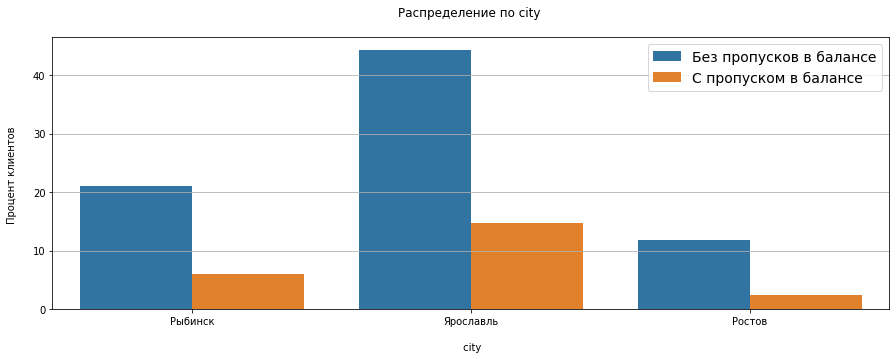

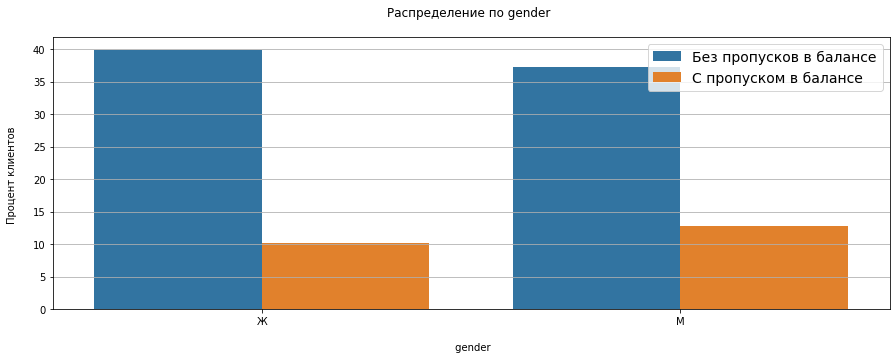

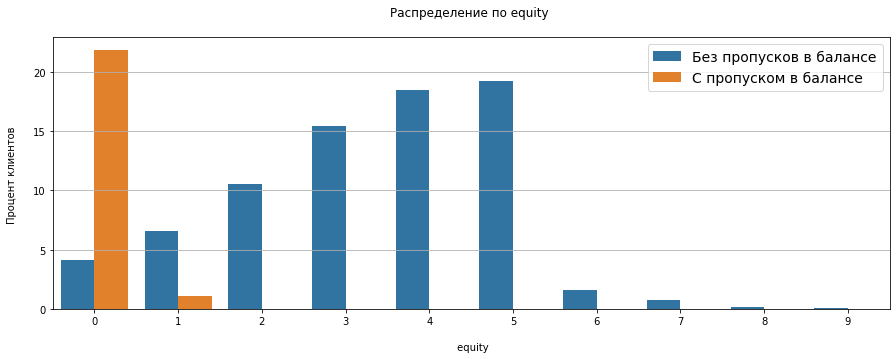

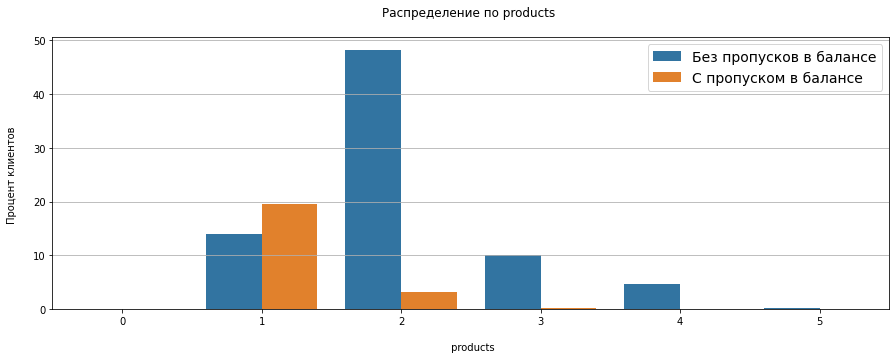

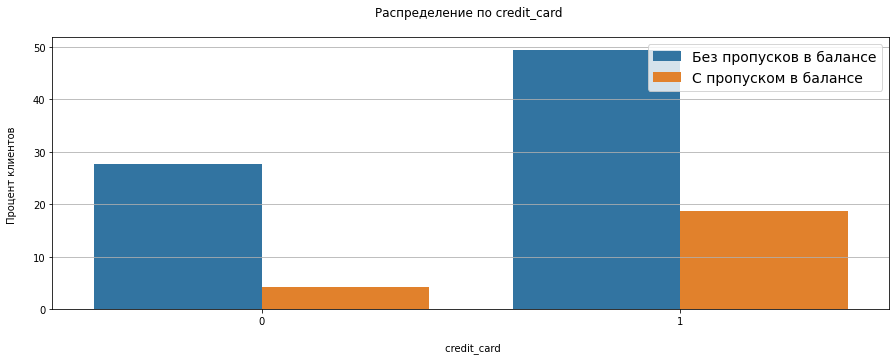

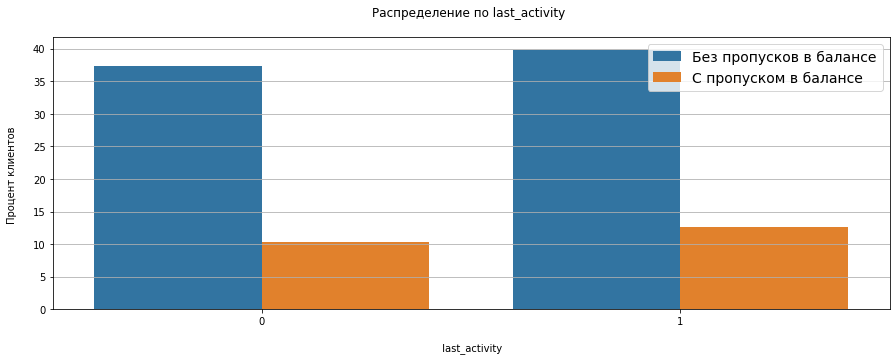

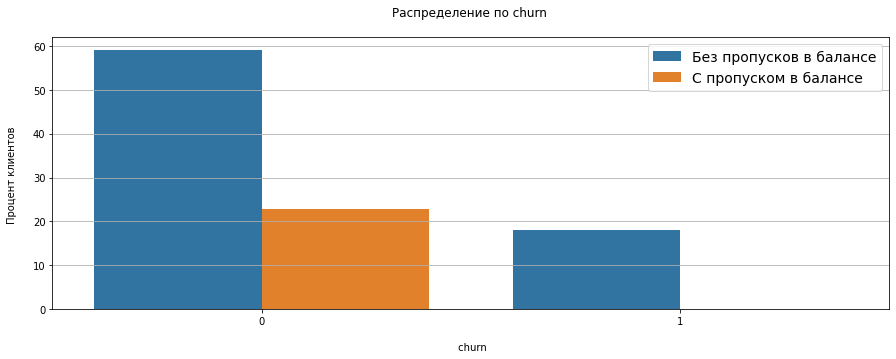

In [13]:
for el in ['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity', 'churn']:
    plt.figure(figsize=(15,5))
    plt.grid(True)
    sns.countplot(data=df, x=el, hue='is_balance_null', stat='percent')
    plt.title(f'Распределение по {el} \n')
    plt.legend(['Без пропусков в балансе', 'С пропуском в балансе'], loc = 'upper right', prop = {'size': 14})
    plt.xlabel(f'\n {el}')
    plt.ylabel('Процент клиентов \n');

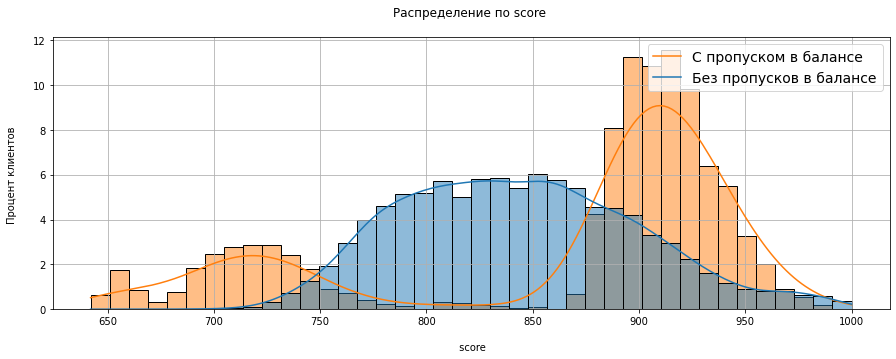

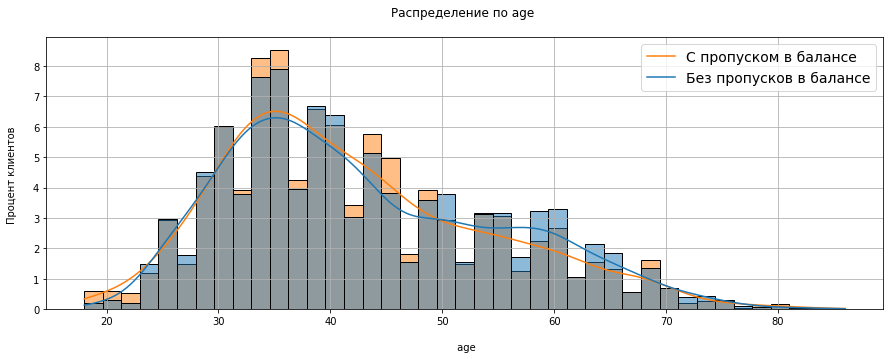

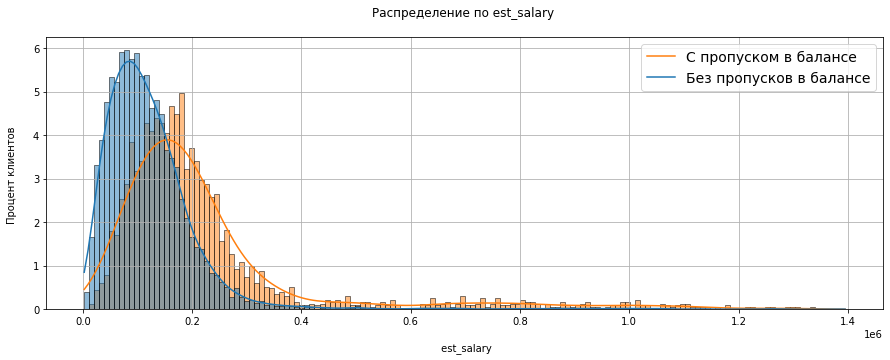

In [14]:
for el in ['score', 'age', 'est_salary']:
    plt.figure(figsize=(15,5))
    plt.grid(True)
    sns.histplot(data=df, x=el, kde=True, hue='is_balance_null', stat='percent', common_norm=False)
    plt.title(f'Распределение по {el} \n')
    plt.legend(['С пропуском в балансе', 'Без пропусков в балансе'], loc = 'upper right', prop = {'size': 14})
    plt.xlabel(f'\n {el}')
    plt.ylabel('Процент клиентов \n');

По графикам распределения видим, что чаще всего пропуски встречаются у клиентов с 0 или 1 баллом собственности, с 1 или 2 продуктами банка в пользовании (один из которых скорее всего кредитная карта), и либо с очень низким кредитным рейтингом, либо с очень высоким, со ожидаемым средним доходом больше чем у клиентов без пропусков в балансе, и никогда не являются уходящими клиентами

Возможно, такое значение допустимо для банковских продуктов, которые не предполагают баланса на счету, например, кредитная карта, или может быть ипотечный кредит. 

Также может быть это чисто техническая ошибка при формировании выгрузки данных. 

In [15]:
# смотрим на пропуски в колонке возраста
df[df['age'].isna()].sample(10, random_state=10)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_balance_null
9301,202983,942.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,163804.73,0,1
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0,0
8385,206759,915.0,Рыбинск,М,NaN,0,NaN,1,1,0,71179.53,0,1
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0,1
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0,1
8015,198635,670.0,Ярославль,Ж,NaN,0,NaN,1,1,1,168699.33,0,1
9634,221809,917.0,Ярославль,М,NaN,0,NaN,1,1,1,192644.15,0,1
8293,216848,930.0,Ярославль,М,NaN,0,NaN,1,1,1,199542.51,0,1
8070,226550,940.0,Рыбинск,М,NaN,0,NaN,1,0,1,147696.95,0,1


Явной связи пропусков в колонке `age` с другими колонками тоже не наблюдается. 

Восстановить пропуски на основании других столбцов не представляется возможным. Заполнить средним или медианным значением - тоже, т.к. это приведет к искажениям в данных. Удалять пропуски в данном случае также не стоит, т.к. потеряем почти 23% данных. 

Поэтому оставим пропуски без изменений.

In [16]:
# проверяем наличие полных дубликатов
df.duplicated().sum()

0

In [17]:
# посмотрим частичные дубликаты по столбцу userid, которые по идее должен быть уникальным, в отличие от всех остальных
df[df['userid'].duplicated()].count()

userid             73
score              73
city               73
gender             73
age                51
equity             73
balance            38
products           73
credit_card        73
last_activity      73
est_salary         73
churn              73
is_balance_null    73
dtype: int64

In [18]:
# рассмотрим список неполных дублей
df[df['userid'].duplicated()].sample(10, random_state=3)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_balance_null
3106,185748,912.0,Ярославль,Ж,47.0,5,1598218.98,2,0,0,180256.98,0,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0,1
6457,228075,839.0,Рыбинск,М,39.0,5,507199.85,3,0,1,85195.80,0,0
9667,163657,849.0,Ярославль,М,NaN,4,1254013.85,2,1,1,119106.67,0,0
2998,208081,821.0,Рыбинск,Ж,62.0,3,493608.26,2,1,1,33491.45,0,0
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0,1
9406,217826,790.0,Рыбинск,Ж,46.0,4,430414.80,2,1,1,49400.37,0,0
9363,155872,714.0,Рыбинск,Ж,29.0,0,NaN,1,1,0,118052.84,0,1
7931,191520,767.0,Ярославль,М,45.0,0,NaN,1,1,1,880005.05,0,1
8785,127440,663.0,Ярославль,М,NaN,0,NaN,1,1,1,117197.56,0,1


In [19]:
# посмотрим на отдельных пользователей с одинаковым id
df[df['userid'] == 226550]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_balance_null
6412,226550,939.0,Ярославль,М,34.0,0,NaN,1,1,1,145913.73,0,1
8070,226550,940.0,Рыбинск,М,NaN,0,NaN,1,0,1,147696.95,0,1


In [20]:
# и ещё на парочку
df[df['userid'] == 155872]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_balance_null
1080,155872,896.0,Ярославль,М,36.0,3,1113656.92,3,0,1,291176.85,1,0
9363,155872,714.0,Рыбинск,Ж,29.0,0,NaN,1,1,0,118052.84,0,1


Полных дубликатов в данных нет. Однако, есть неполные по столбцу `userid`. При ближайшем рассмотрении видим, что дублируются только сами id, значения в остальных колонках разные. Так же видим, что пользователи из разных городов. Вероятно у каждого филиала своя база данных, которая не связана с базами данных в других отделениях.

Сформируем столбец `user_id` заново, на этот раз с полностью уникальными значениями, на случай если нам необходимо будет посчитать количество пользователей:

In [21]:
df = df.reset_index()
df = df.drop('userid', axis=1)
df = df.rename(columns={'index': 'userid'})
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_balance_null
0,0,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0
1,1,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0
2,2,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1
3,3,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0
4,4,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0


In [22]:
# добавляем дополнительные столбцы для города, чтобы в дальнейшем провести корреляционный анализ
for el in df.city.unique():
    df['is_' + el] = df.city.apply(lambda x: 1 if x == el else 0)

In [23]:
# тоже самое для колонки с обозначением пола
df['is_male']= df.gender.apply(lambda x: 1 if x == 'М' else 0)
df['is_female']= df.gender.apply(lambda x: 1 if x == 'Ж' else 0)

In [24]:
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_balance_null,is_Рыбинск,is_Ярославль,is_Ростов,is_male,is_female
0,0,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,0,0,1
1,1,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,0,0,1
2,2,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1,1,0,0,0,1
3,3,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,0,0,1
4,4,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1,0


#### Вывод

- данные загружены без ошибок
- есть пропуски в столбцах `age` и `balance`. Чаще всего пропуски встречаются у клиентов с 0 или 1 баллом собственности, с 1 или 2 продуктами банка в пользовании (один из которых скорее всего кредитная карта), и либо с очень низким кредитным рейтингом, либо с очень высоким и никогда не являются уходящими клиентами. Возможно, такое значение допустимо для банковских продуктов, которые не предполагают баланса на счету: кредитная карта, или может быть ипотечный кредит. Также нельзя исключить и просто техническую ошибку при формировании датасета
- пропуски оставлены как есть, без замены и удаления
- полных дублей в данных нет 
- есть неполные дубликаты по столбцу `userid`, но данные в остальных колонках никак не совпадают. По отдельным записям видно, что города у пользователей с одинаковым id всегда разные. Вероятно, базы данных филиалов не связанны друг с другом.
- название колонок приведены к единому стилю

### Исследовательский анализ данных

#### Портрет типичного пользователя

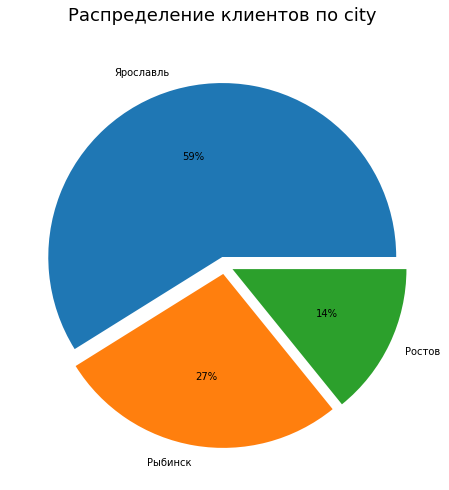

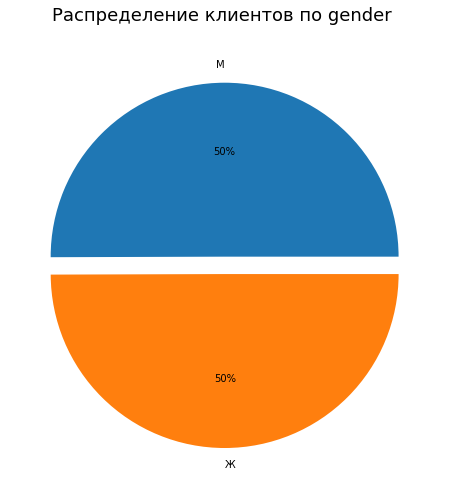

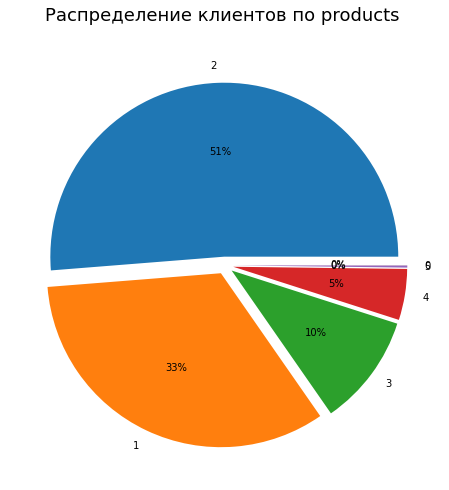

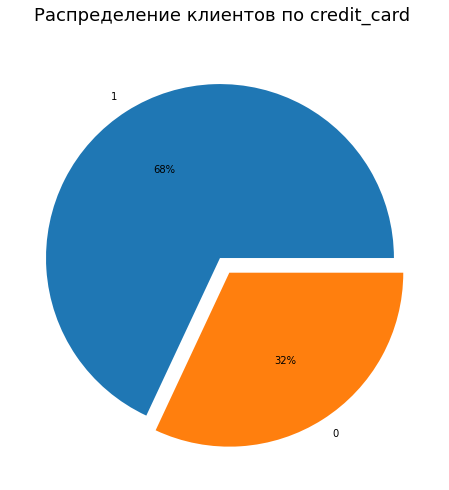

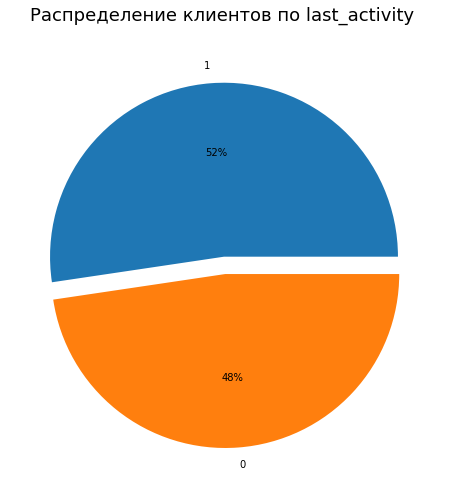

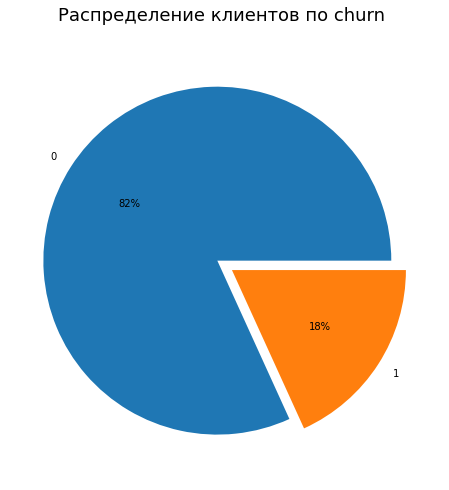

In [25]:
for el in ['city', 'gender', 'products', 'credit_card', 'last_activity', 'churn']:
    explode = tuple([0.05] * df[el].nunique())
    plt.figure(figsize=(15,5))
    df[el].value_counts().plot(kind='pie', 
                            autopct='%1.0f%%',
                            figsize=(15,8), 
                            explode=explode).set_title(f'Распределение клиентов по {el} \n',
                                                                    fontsize=18)
    plt.ylabel('');

In [26]:
df.city.value_counts()

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

Учитывая численность населения в городах, ожидаемо, большая часть клиентов из Ярославля, затем идет Рыбинск и Ростов

In [27]:
df.last_activity.value_counts()

1    5235
0    4765
Name: last_activity, dtype: int64

По признаку последней активности пользователи так же распределены примерно поровну

In [28]:
df.churn.value_counts()

0    8180
1    1820
Name: churn, dtype: int64

Уходит около 18% пользователей

In [29]:
df.products.value_counts()

2    5126
1    3341
3    1039
4     474
5      19
0       1
Name: products, dtype: int64

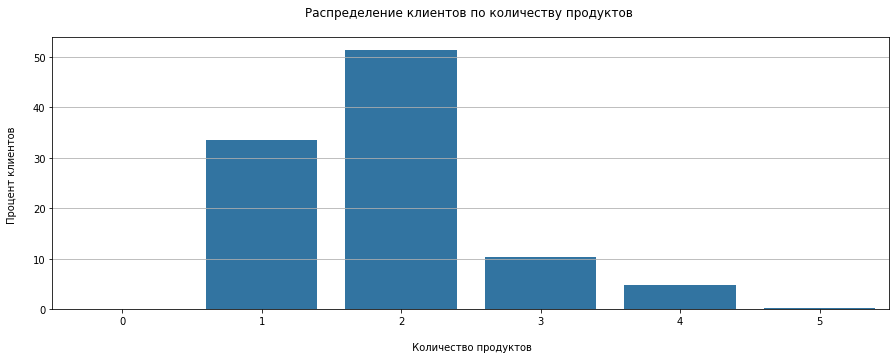

In [30]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.countplot(data=df, x="products", stat='percent')
plt.title('Распределение клиентов по количеству продуктов \n')
plt.xlabel('\n Количество продуктов')
plt.ylabel('Процент клиентов \n');

In [34]:
df[df['products'] == 0]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_balance_null,is_Рыбинск,is_Ярославль,is_Ростов,is_male,is_female
8957,8957,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1,1,1,0,0,0,1


Большая часть клиентов пользуется одним или двумя продуктами.
Группа клиентов с 5 продуктами незначительна по размеру, в дальнейшем ей можно пренебречь. 

Есть уникальный клиент женского пола, 79 лет с 0 продуктов, и отсутствующим балансом. Интересно было бы узнать, как клиент без продуктов оказался в этих данных.

In [35]:
df.credit_card.value_counts()

1    6804
0    3196
Name: credit_card, dtype: int64

У 68% клиентов банка есть кредитная карта.

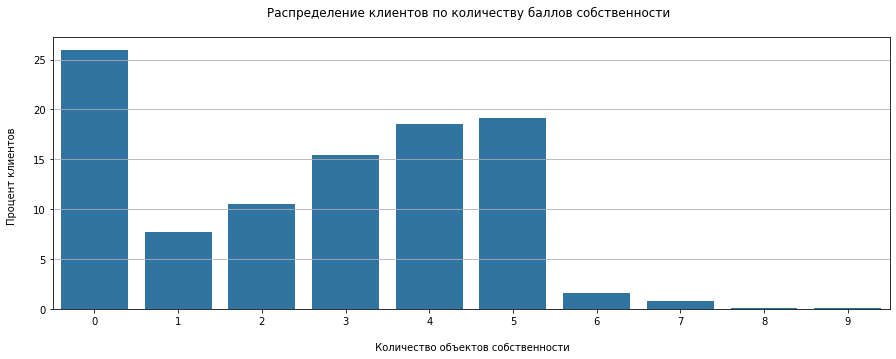

In [36]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.countplot(data=df, x="equity", stat="percent")
plt.title('Распределение клиентов по количеству баллов собственности \n')
plt.xlabel('\n Количество объектов собственности')
plt.ylabel('Процент клиентов \n');

In [37]:
df.equity.value_counts().sort_index()

0    2592
1     774
2    1052
3    1543
4    1850
5    1918
6     161
7      80
8      17
9      13
Name: equity, dtype: int64

Из графика и таблицы видим, что большая часть клиентов имеет от 0 до 5 баллов собственности. 

Самая значительная часть клиентов (25,9%) - 0 баллов.
Группа клиентов с 6,7,8,9 слишком малы по сравнению со всеми остальными группами (каждая из групп менее 1,6%).

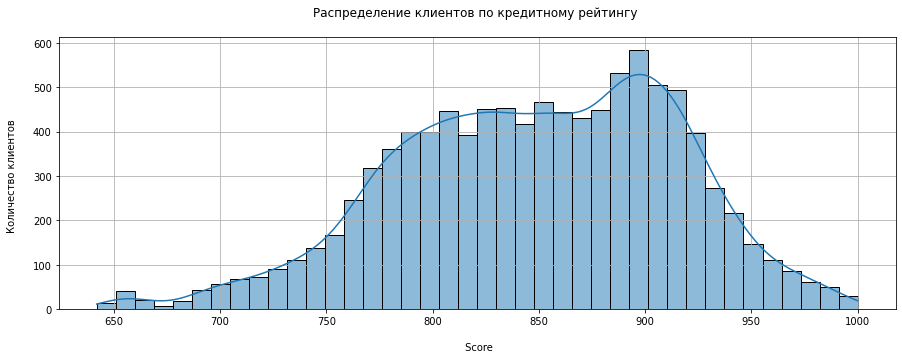

In [38]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.histplot(data=df, x='score', kde=True)
plt.title('Распределение клиентов по кредитному рейтингу \n')
plt.xlabel('\n Score')
plt.ylabel('Количество клиентов \n');

Большая часть пользователей имеет рейтинг `score` от 750 до 950. Внутри этого интервала выделяется группа клиентов с рейтингом от 880 до 920

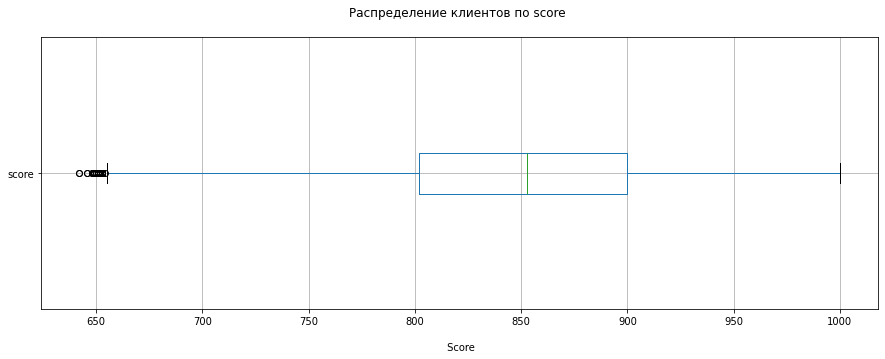

In [39]:
# посмотрим на выбросы в рейтинге
plt.figure(figsize=(15,5))
plt.title('Распределение клиентов по score \n')
plt.xlabel('\n Score')
df.score.plot(kind='box', grid=True, vert=False);

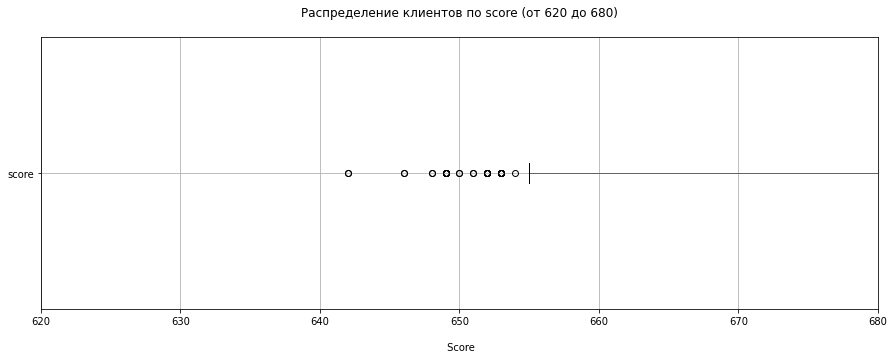

In [40]:
plt.figure(figsize=(15,5))
plt.title('Распределение клиентов по score (от 620 до 680)\n')
plt.xlabel('\n Score')
df.score.plot(kind='box', grid=True, vert=False)
plt.xlim([620,680]);

In [41]:
df[df['score'] <= 655].shape[0]

39

Видим небольшую группу (0.39%) пользователей с рейтингом ниже 655.

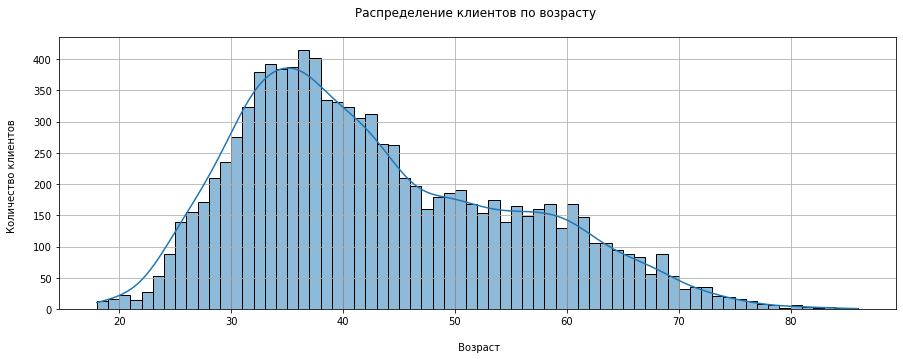

In [42]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.histplot(data=df, x='age', kde=True, bins=68)
plt.title('Распределение клиентов по возрасту \n')
plt.xlabel('\n Возраст')
plt.ylabel('Количество клиентов \n');

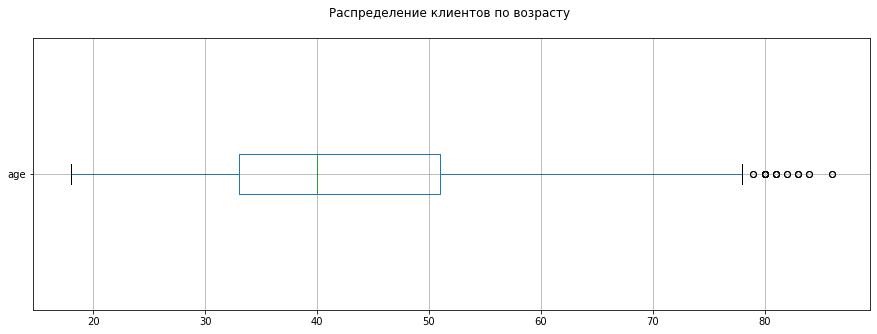

In [43]:
# посмотрим на выбросы
plt.figure(figsize=(15,5))
plt.title('Распределение клиентов по возрасту \n')
df.age.plot(kind='box', grid=True, vert=False);

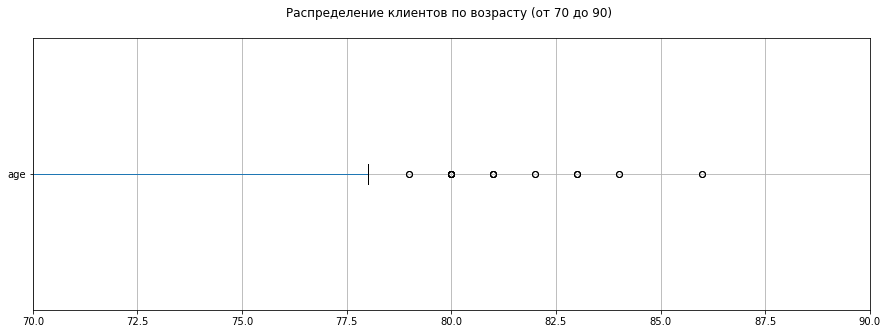

In [44]:
plt.figure(figsize=(15,5))
plt.title('Распределение клиентов по возрасту (от 70 до 90) \n')
df.age.plot(kind='box', grid=True, vert=False)
plt.xlim([70,90]);

Большая часть клиентов в возрасте от 25 до 65. Внутри этого промежутка выделяется группа клиентов от 47 до 62 лет. Клиенты старше 78 лет уже являются аномалией для банка.

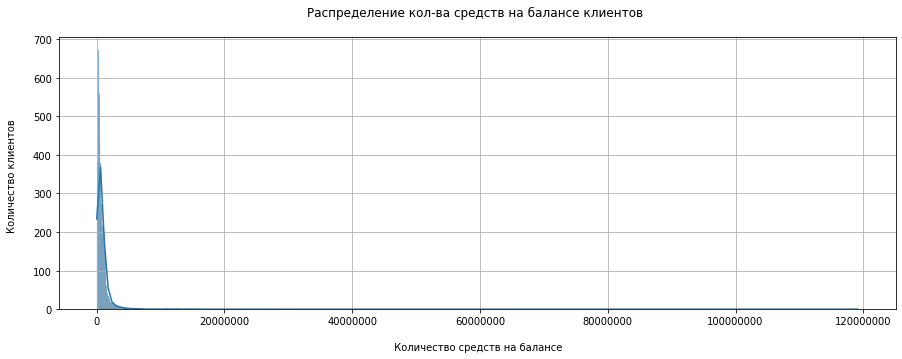

In [45]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.histplot(data=df, x='balance', kde=True)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.title('Распределение кол-ва средств на балансе клиентов \n')
plt.xlabel('\n Количество средств на балансе')
plt.ylabel('Количество клиентов \n');

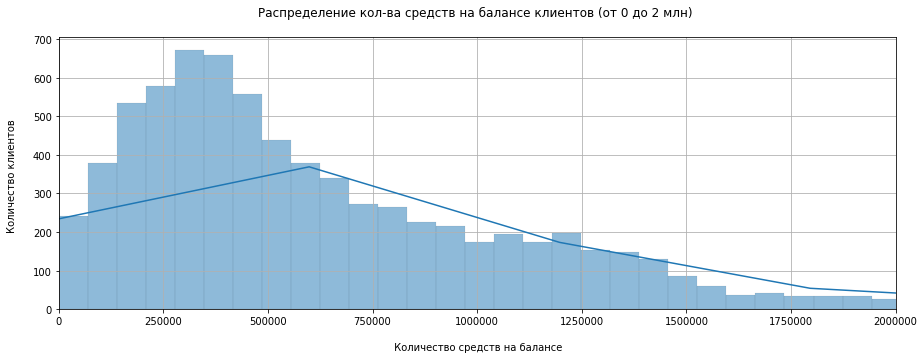

In [46]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.histplot(data=df, x='balance', kde=True)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.title('Распределение кол-ва средств на балансе клиентов (от 0 до 2 млн) \n')
plt.xlabel('\n Количество средств на балансе')
plt.ylabel('Количество клиентов \n')
plt.xlim([0, 2000000]);

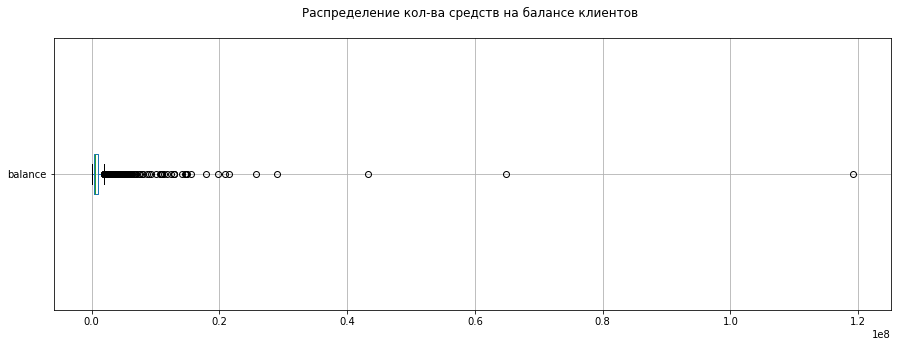

In [47]:
plt.figure(figsize=(15,5))
plt.title('Распределение кол-ва средств на балансе клиентов \n')
df.balance.plot(kind='box', grid=True, vert=False);

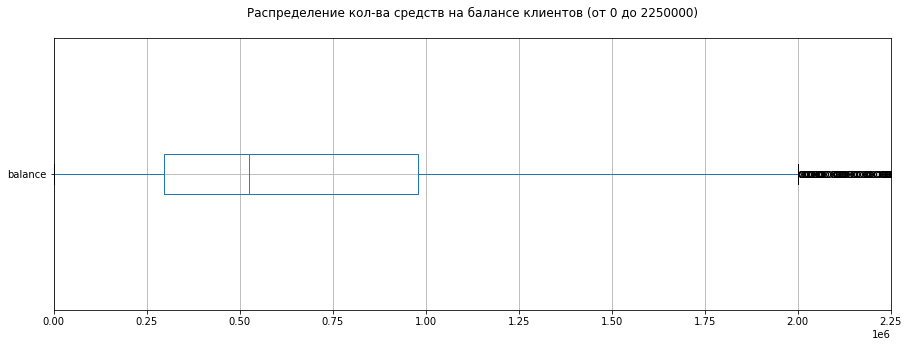

In [48]:
plt.figure(figsize=(15,5))
plt.title('Распределение кол-ва средств на балансе клиентов (от 0 до 2250000)\n')
df.balance.plot(kind='box', grid=True, vert=False)
plt.xlim([0,2250000]);

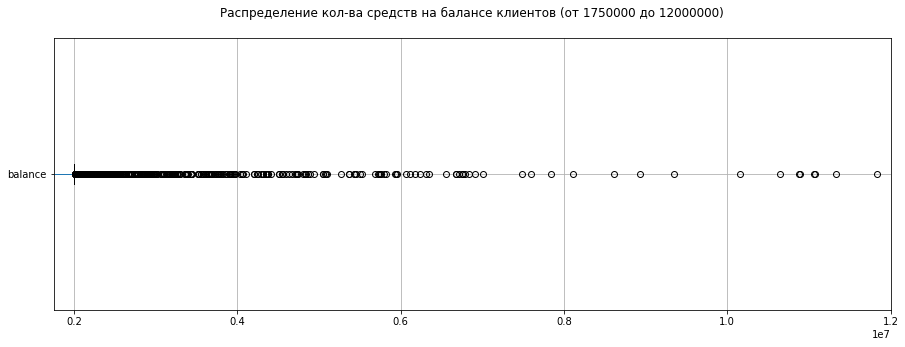

In [49]:
plt.figure(figsize=(15,5))
plt.title('Распределение кол-ва средств на балансе клиентов (от 1750000 до 12000000)\n')
df.balance.plot(kind='box', grid=True, vert=False)
plt.xlim([1750000, 12000000]);

У большой части клиентов на балансе от 250 тысяч до 1 миллиона. На графиках распределения видим огромный "хвост" выбросов свыше 2 миллионов.

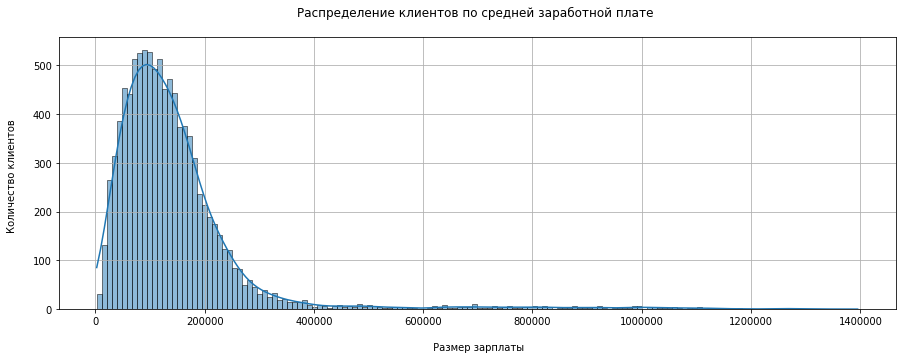

In [50]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.histplot(data=df, x='est_salary', kde=True)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.title('Распределение клиентов по средней заработной плате \n')
plt.xlabel('\n Размер зарплаты')
plt.ylabel('Количество клиентов \n');

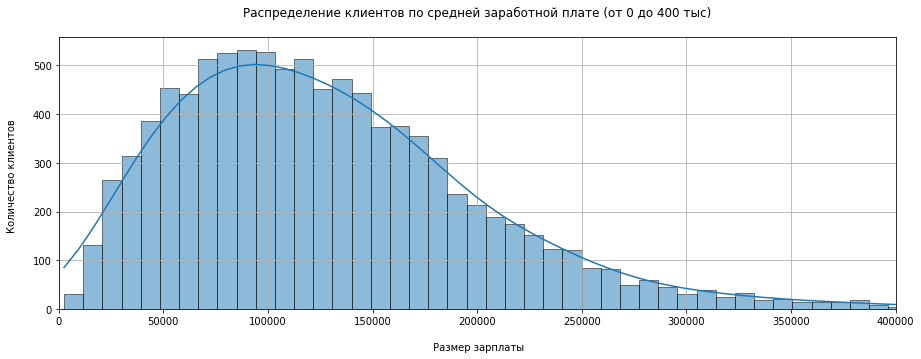

In [51]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.histplot(data=df, x='est_salary', kde=True)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.title('Распределение клиентов по средней заработной плате (от 0 до 400 тыс)\n')
plt.xlabel('\n Размер зарплаты')
plt.ylabel('Количество клиентов \n')
plt.xlim([0, 400000]);

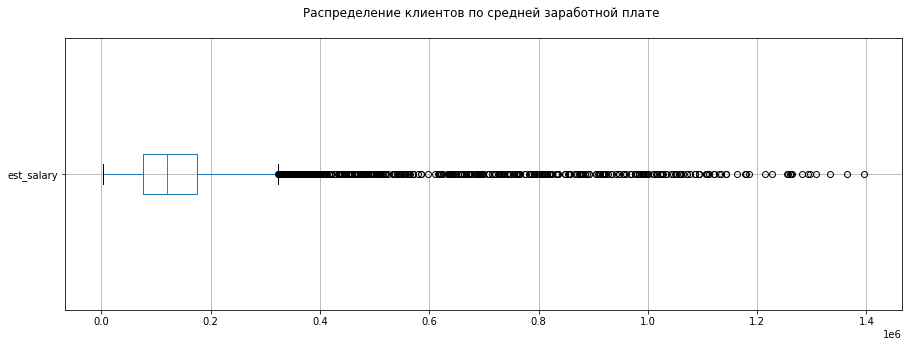

In [52]:
plt.figure(figsize=(15,5))
plt.title('Распределение клиентов по средней заработной плате \n')
df.est_salary.plot(kind='box', grid=True, vert=False);

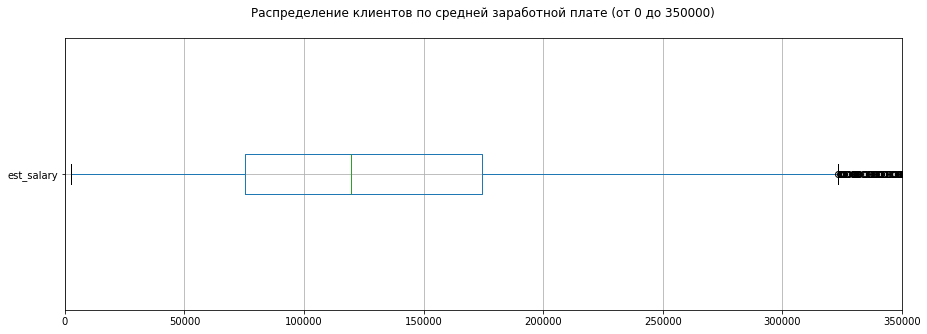

In [53]:
plt.figure(figsize=(15,5))
plt.title('Распределение клиентов по средней заработной плате (от 0 до 350000)\n')
df.est_salary.plot(kind='box', grid=True, vert=False)
plt.xlim([0, 350000]);

Ожидаемый доход большей части клиентов - от 75 до 175 тысяч. На графиках также видим длинный "хвост" из аномально высоких значений

##### Вывод
Портрет типичного пользователя выглядит следующим образом:
- имеет рейтинг от от 750 до 950
- является жителем Ярославля
- в возрасте от 25 до 65
- имеет от 0 до 5 баллов собственности
- держит на счету от 250 тысяч до миллиона
- пользуется одним или двумя продуктами банка
- имеет кредитную карту
- имеет среднюю заработную плату от 75 до 175 тысяч 

#### Отток и его связь с другими признаками

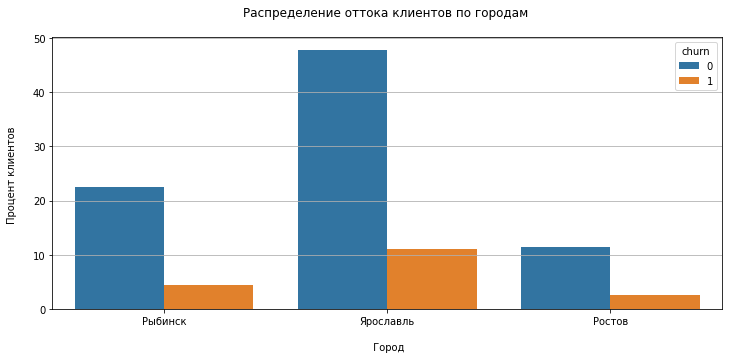

In [54]:
plt.figure(figsize=(12,5))
plt.grid(True)
sns.countplot(df, x="city", stat="percent", hue='churn')
plt.title('Распределение оттока клиентов по городам \n')
plt.xlabel('\n Город')
plt.ylabel('Процент клиентов \n');

In [55]:
df.groupby('city').agg({'churn':'mean'})

,churn
city,
Ростов,0.187721
Рыбинск,0.162152
Ярославль,0.189708


Похоже, отток по городам отличается не сильно

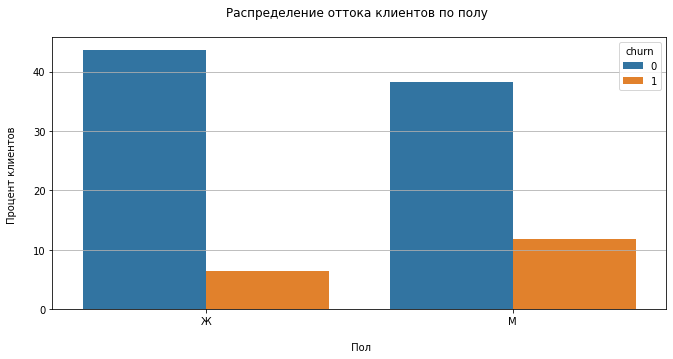

In [56]:
plt.figure(figsize=(11,5))
plt.grid(True)
sns.countplot(df, x="gender", stat="percent", hue='churn')
plt.title('Распределение оттока клиентов по полу \n')
plt.xlabel('\n Пол')
plt.ylabel('Процент клиентов \n');

In [57]:
df.groupby('gender').agg({'churn':'mean'})

,churn
gender,
Ж,0.127528
М,0.236364


Мужчины покидают банк чаще

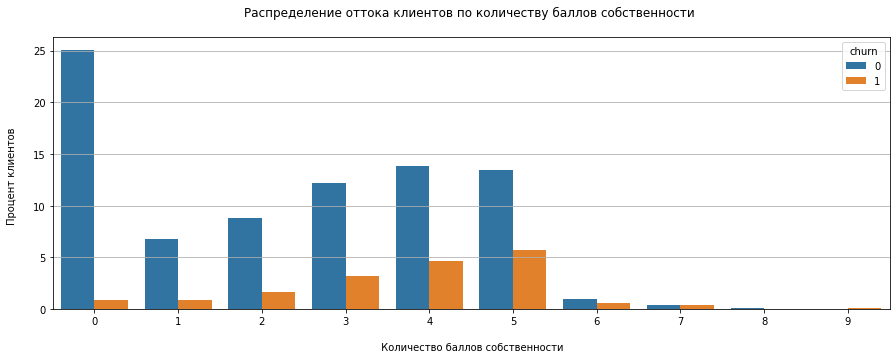

In [58]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.countplot(df, x="equity", stat="percent", hue='churn')
plt.title('Распределение оттока клиентов по количеству баллов собственности \n')
plt.xlabel('\n Количество баллов собственности')
plt.ylabel('Процент клиентов \n');

In [59]:
df.groupby('equity').agg({'userid':'count', 'churn':'mean'})

,userid,churn
equity,,
0,2592,0.034722
1,774,0.120155
2,1052,0.157795
3,1543,0.208684
4,1850,0.250811
5,1918,0.300834
6,161,0.360248
7,80,0.462500
8,17,0.352941


На промежутке от 0 до 5 балов видим, что с увеличением баллов собственности увеличивается и отток. На промежутке от 6 до 9 балоов тенденция уже не выраженна так явно, но и количество пользователей с таким количеством баллов относительно мало.

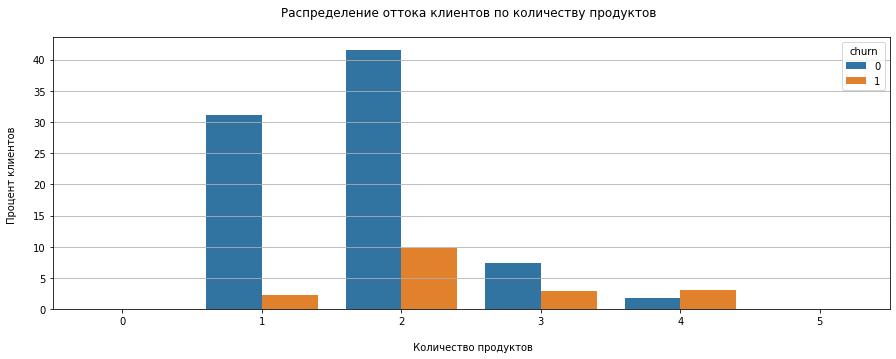

In [60]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.countplot(df, x="products", stat="percent", hue='churn')
plt.title('Распределение оттока клиентов по количеству продуктов \n')
plt.xlabel('\n Количество продуктов')
plt.ylabel('Процент клиентов \n');

In [61]:
df.groupby('products').agg({'userid':'count', 'churn':'mean'})

,userid,churn
products,,
0,1,1.000000
1,3341,0.070338
2,5126,0.190987
3,1039,0.285852
4,474,0.632911
5,19,0.421053


Опять же наблюдаем тенденцию к росту оттока клиентов с увеличением числа продуктов.

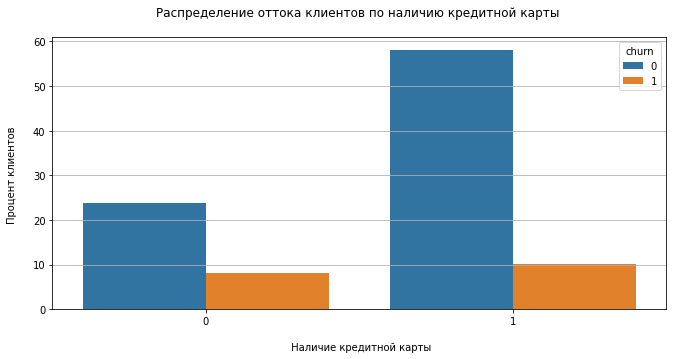

In [62]:
plt.figure(figsize=(11,5))
plt.grid(True)
sns.countplot(df, x="credit_card", stat="percent", hue='churn')
plt.title('Распределение оттока клиентов по наличию кредитной карты \n')
plt.xlabel('\n Наличие кредитной карты')
plt.ylabel('Процент клиентов \n');

In [63]:
df.groupby('credit_card').agg({'churn':'mean'})

,churn
credit_card,
0,0.255632
1,0.147413


Клиенты без кредитной карты уходят чаще

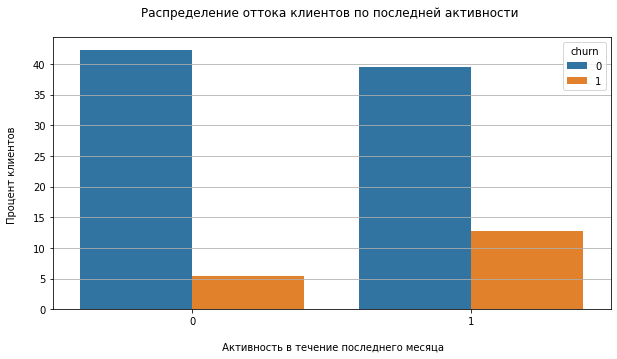

In [64]:
plt.figure(figsize=(10,5))
plt.grid(True)
sns.countplot(df, x="last_activity", stat="percent", hue='churn')
plt.title('Распределение оттока клиентов по последней активности \n')
plt.xlabel('\n Активность в течение последнего месяца')
plt.ylabel('Процент клиентов \n');

In [65]:
df.groupby('last_activity').agg({'churn':'mean'})

,churn
last_activity,
0,0.113746
1,0.244126


Клиенты, которые были активны в последний месяц уходят чаще, чем неактиные

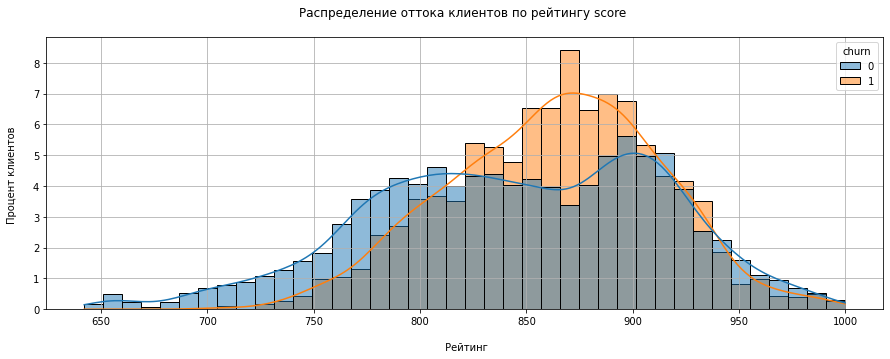

In [66]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.histplot(data=df, x='score', kde=True, hue='churn', stat='percent', common_norm=False)
plt.title('Распределение оттока клиентов по рейтингу score \n')
plt.xlabel('\n Рейтинг')
plt.ylabel('Процент клиентов \n');

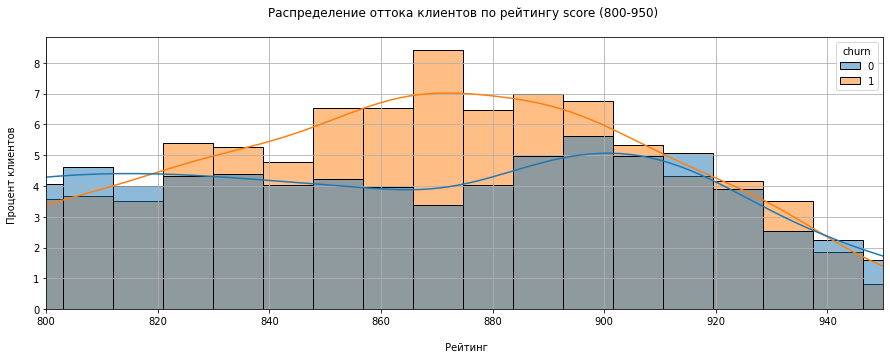

In [67]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.histplot(data=df, x='score', kde=True, hue='churn', stat='percent', common_norm=False)
plt.title('Распределение оттока клиентов по рейтингу score (800-950) \n')
plt.xlabel('\n Рейтинг')
plt.ylabel('Процент клиентов \n')
plt.xlim([800, 950]);

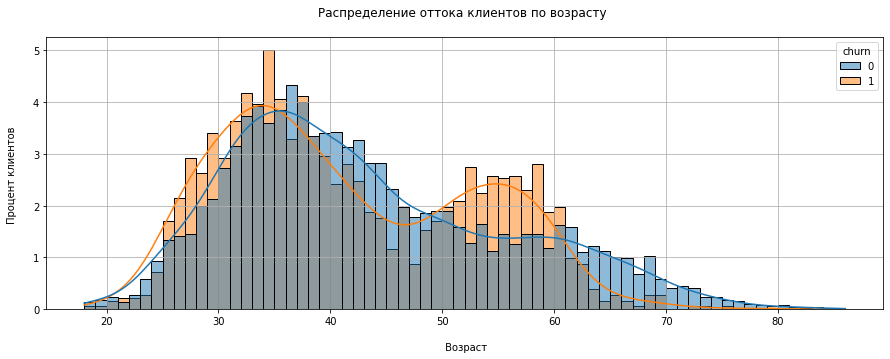

In [68]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.histplot(data=df, x='age', kde=True, bins=68, hue='churn', stat='percent', common_norm=False)
plt.title('Распределение оттока клиентов по возрасту \n')
plt.xlabel('\n Возраст')
plt.ylabel('Процент клиентов \n');

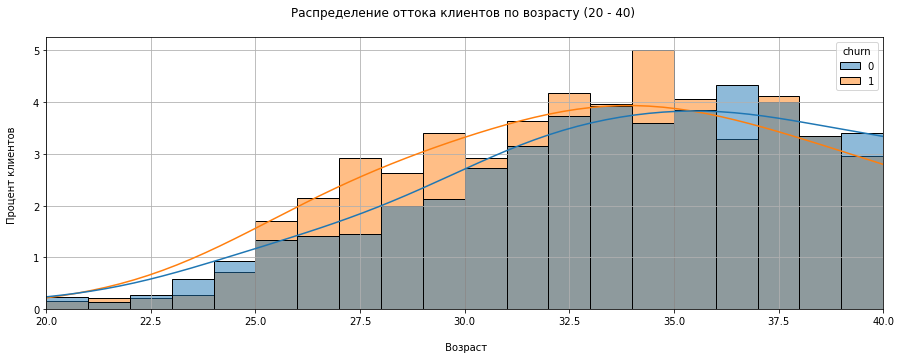

In [69]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.histplot(data=df, x='age', kde=True, bins=68, hue='churn', stat='percent', common_norm=False)
plt.title('Распределение оттока клиентов по возрасту (20 - 40) \n')
plt.xlabel('\n Возраст')
plt.ylabel('Процент клиентов \n')
plt.xlim([20, 40]);

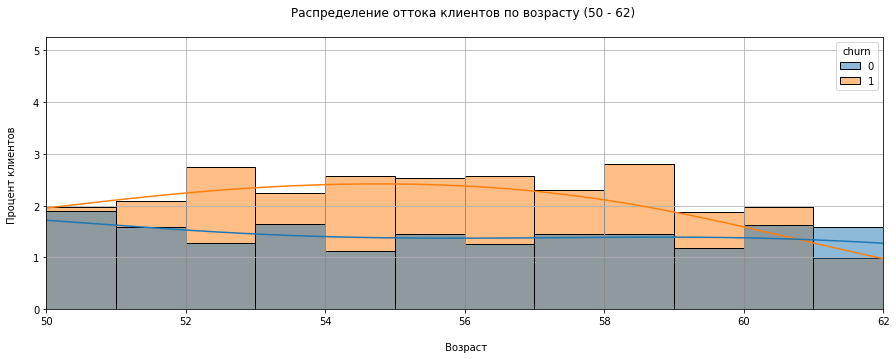

In [70]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.histplot(data=df, x='age', kde=True, bins=68, hue='churn', stat='percent', common_norm=False)
plt.title('Распределение оттока клиентов по возрасту (50 - 62) \n')
plt.xlabel('\n Возраст')
plt.ylabel('Процент клиентов \n')
plt.xlim([50, 62]);

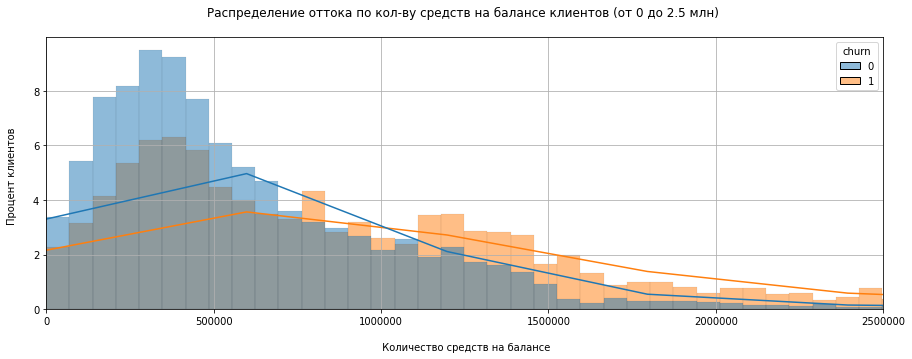

In [71]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.histplot(data=df, x='balance', kde=True, hue='churn',  stat='percent', common_norm=False)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.title('Распределение оттока по кол-ву средств на балансе клиентов (от 0 до 2.5 млн) \n')
plt.xlabel('\n Количество средств на балансе')
plt.ylabel('Процент клиентов \n')
plt.xlim([0, 2500000]);

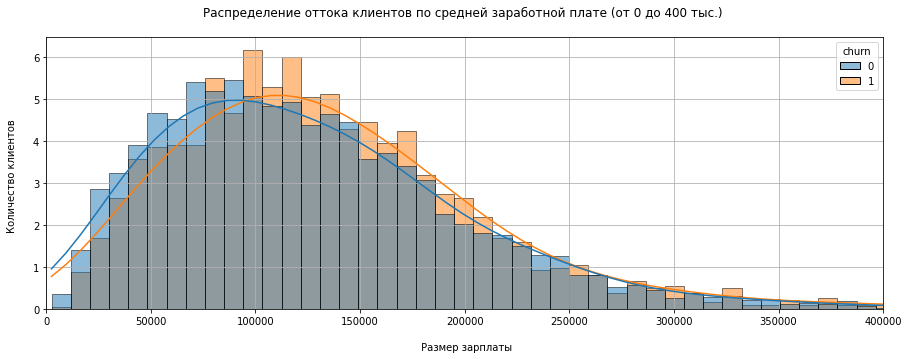

In [72]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.histplot(data=df, x='est_salary', kde=True, hue='churn', stat='percent', common_norm=False)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.title('Распределение оттока клиентов по средней заработной плате (от 0 до 400 тыс.) \n')
plt.xlabel('\n Размер зарплаты')
plt.ylabel('Количество клиентов \n')
plt.xlim([0, 400000]);

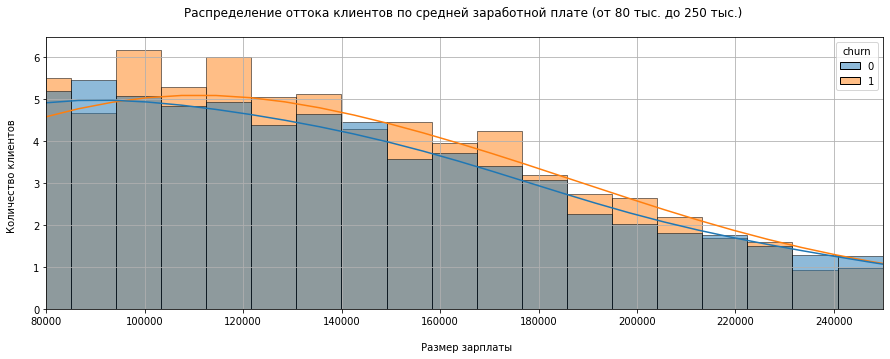

In [73]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.histplot(data=df, x='est_salary', kde=True, hue='churn', stat='percent', common_norm=False)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.title('Распределение оттока клиентов по средней заработной плате (от 80 тыс. до 250 тыс.) \n')
plt.xlabel('\n Размер зарплаты')
plt.ylabel('Количество клиентов \n')
plt.xlim([80000, 250000]);

##### Вывод

Чаще всего банк покидают пользователи:
- мужского пола
- с 6 и более баллами собственности
- с 4 продуктами банка
- не имеющие кредитной карты
- активные в течение последнего месяца
- в возрасте от 26 до 36 и от 50 до 61 включительно
- с балансом свыше 1 млн 
- со средней зарплатой от 100 до 220 тысяч
- с рейтингом от 830 до 930

#### Корреляционный анализ признаков

Для подсчета корреляций будем использовать коэффициент φK, т.к. в датасете имеются и категориальные, и дискретные, и непрерывные величины.

Для начала уберем из датасета `userid`.

In [74]:
cor_df = df.drop(columns={'userid'})

In [75]:
interval_cols = ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']
corr_matrix= cor_df.phik_matrix(interval_cols=interval_cols)

<Axes: >

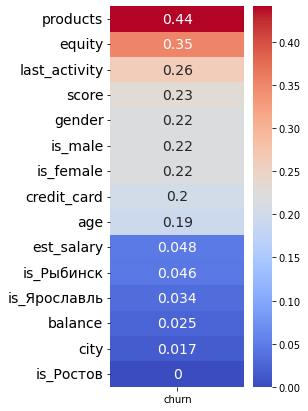

In [130]:
churn_corr = corr_matrix['churn'].to_frame().sort_values(by='churn', ascending=False)
churn_corr = churn_corr.drop(['churn', 'is_balance_null'])
plt.figure(figsize=(3,7))
plt.yticks(fontsize=14)
sns.heatmap(churn_corr, annot=True, cmap="coolwarm", annot_kws={"fontsize":14})


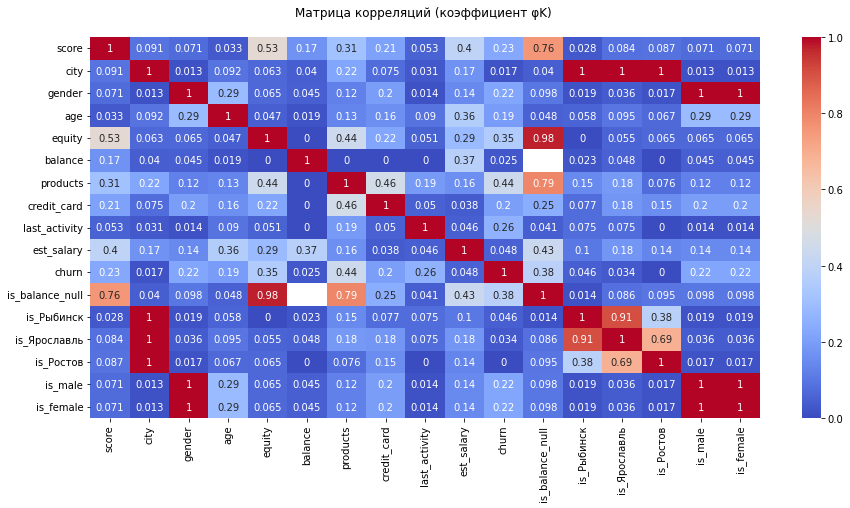

In [76]:
plt.figure(figsize=(15,7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Матрица корреляций (коэффициент φK) \n');

В матрице видим следующее:

- самая сильная корреляция между признаком отсуствующего баланса и `equity`(0.98). Как мы видели и ранее на графиках, этот признак чаще встерчается у клиентов с 0 или 1 баллом собственности. 
- далее идет корреляция признака отсутствующего баланса с `products` (0.79), `score` (0.76). Опять же, как видели ранее на графиках, чаще пропуск в балансе встречается у клиентов с 1 или 2 продуктами и у клиентов с либо невысоким, либо очень высоким рейтингом 
- средняя корреляция между `equity` и `score` (0.53). Вероятно, `score` рассчитывается в том числе и с учетом `equity`
- `score` также ожидаемо коррелирует со ожидаемой средней заработной платой `est_salary` (0.4)
- `equity` коррелирует с `products` (0.44). Похоже, клиенты с большим количеством объектов собственности пользуются большим количеством продуктов
- помимо `equity`,  `products` коррелирует с кредитным рейтингом `score`(0.31) и наличием кредитной карты(0.46) 
- также наблюдается слабая корреляция `equity` с `churn` (0.35). Ранее на графиках мы явно наблюдали, как с увеличением числа объектов собственности увеличивался отток
- наиболее сильно отток `churn` коррелирует с `products` (0.44). Опять же, на графиках распределения выше, можно явно наблюдать как с увеличением числа продуктов увеличивается показатель оттока клиентов
- также показатель оттока`churn` слабо коррелирует с рейтингом `score` (0.23), с полом клиента (0.22), с возрастом (0.19), наличием кредитной карты (0.2), активность за последний месяц (0.26)  

#### Вывод

Портрет типичного пользователя выглядит следующим образом:
- имеет рейтинг от от 750 до 950
- является жителем Ярославля
- в возрасте от 25 до 65
- имеет от 0 до 5 баллов собственности
- держит на счету от 250 тысяч до 1 миллиона
- пользуется одним или двумя продуктами банка
- имеет кредитную карту
- имеет среднюю заработную плату от 75 до 175 тысяч

Чаще всего банк покидают пользователи:
- мужского пола
- с 6 и более баллами собственности
- с 4 продуктами банка
- не имеющие кредитной карты
- активные в течение последнего месяца
- в возрасте от 26 до 36 и от 50 до 61 включительно
- с балансом свыше 1 млн 
- со средней зарплатой от 100 до 220 тысяч
- с рейтингом от 830 до 930

Результаты корреляционного анализа:
- самая сильная корреляция между признаком отсуствующего баланса и `equity`(0.98). Как мы видели и ранее на графиках, этот признак чаще встерчается у клиентов с 0 или 1 баллом собственности. 
- далее идет корреляция признака отсутствующего баланса с `products` (0.79), `score` (0.76). Опять же, как видели ранее на графиках, чаще пропуск в балансе встречается у клиентов с 1 или 2 продуктами и у клиентов с либо невысоким, либо очень высоким рейтингом 
- средняя корреляция между `equity` и `score` (0.53). Вероятно, `score` рассчитывается в том числе и с учетом `equity`
- `score` также ожидаемо коррелирует со ожидаемой средней заработной платой `est_salary` (0.4)
- `equity` коррелирует с `products` (0.44). Похоже, клиенты с большим количеством баллов собственности пользуются большим количеством продуктов
- помимо `equity`,  `products` коррелирует с кредитным рейтингом `score`(0.31) и наличием кредитной карты(0.46) 
- также наблюдается слабая корреляция `equity` с `churn` (0.35). Ранее на графиках мы явно наблюдали, как с увеличением числа объектов собственности увеличивался отток
- наиболее сильно отток `churn` коррелирует с `products` (0.44). Опять же, на графиках распределения выше, можно явно наблюдать как с увеличением числа продуктов увеличивается показатель оттока клиентов
- также показатель оттока`churn` слабо коррелирует с рейтингом `score` (0.23), с полом клиента (0.22), с возрастом (0.19), наличием кредитной карты (0.2), активность за последний месяц (0.26)



### Проверка статистических гипотез 

#### Гипотеза различия среднего возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

Нулевая гипотеза - различий в среднем возрасте клиентов с одни и двумя продуктами банка нет <br>
Альтернативная гипотеза - различия в среднем возрасте клиентов есть

Далее рассмотрим насколько выборки различны по размеру и удалим строки с отсутствующими значениям

In [77]:
prod = df.dropna(subset=['age'])

In [78]:
prod_1 = prod[prod['products'] == 1]
prod_2 = prod[prod['products'] == 2]

In [79]:
print('Количество записей клиентов с одним продуктом: ', prod_1.shape[0])
print('Количество записей клиентов с одним продуктом: ', prod_2.shape[0])

Количество записей клиентов с одним продуктом:  3323
Количество записей клиентов с одним продуктом:  5119


In [80]:
print(f'Дисперсия возраста клиентов с 1 продуктом {np.var(prod_1.age)}')
print(f'Дисперсия возраста клиентов с 2 продуктами {np.var(prod_2.age)}')

Дисперсия возраста клиентов с 1 продуктом 143.6425134588908
Дисперсия возраста клиентов с 2 продуктами 147.77878665911112


Для проверки гипотезы используем двухвыборчный t-test так как:
- выборки независимы друг от друга
- выборки достаточно велики, чтобы предполгать, что выборочные средние нормально распределены

Несмотря на то, что дисперсии близки по значениям, добавим параметр equal_var=Falsе, т.к. выборки сильно различаются по размеру.

Возьмем уровень статистической значимости равный 5%

In [81]:
alpha = 0.05

res = st.ttest_ind(prod_1.age, prod_2.age, equal_var=False)

print('p-value равно:', res.pvalue) 

if res.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p-value равно: 0.03299080704232691
Отвергаем нулевую гипотезу


Как видим, по итогам теста нулевую гипотезу о равенстве среднего возраста клиентов с одним и двумя продуктами можно отвергнуть. Однако, если взять статистическую значимость в 1%, то нулевую гипотезу отвергнуть уже не получится. Можно предположить, что средний возраст в обоих выборках довольно близок к друг другу по значениям, но не равен.

#### Гипотеза различия среднего возраста между уходящими и остающимися клиентами

Нулевая гипотеза - различий в среднем возрасте уходящих клиентов и остающихся клиентов нет <br>
Альтернативная гипотеза - различия в среднем возрасте клиентов есть

In [82]:
churn_0 = prod[prod['churn'] == 0] 
churn_1 = prod[prod['churn'] == 1] 

In [83]:
print(f'Дисперсия возраста остающихся клиентов {np.var(churn_0.age)}')
print(f'Дисперсия возраста уходящих клиентов {np.var(churn_1.age)}')

Дисперсия возраста остающихся клиентов 153.12697193891648
Дисперсия возраста уходящих клиентов 124.84455601356521


Для проверки гипотезы используем двухвыборчный t-test так как:
- выборки независимы друг от друга
- выборки достаточно велики, чтобы предполгать, что выборочные средние нормально распределены

Выборки у нас независимы, поэтому будем использовать двухвыборчный t-test, добавим параметр equal_var=Falsе, т.к. значения дисперсии двух выборок значительно различаются.

Возьмем уровень статистической значимости равный 5%

In [84]:
alpha = 0.05

res = st.ttest_ind(churn_0.age, churn_1.age, equal_var=False)

print('p-value равно:', res.pvalue) 

if res.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p-value равно: 1.1721656853879547e-07
Отвергаем нулевую гипотезу


Как видим, по итогам теста нулевую гипотезу о равенстве среднего возраста уходящих и остающихся клиентов можно отвергнуть, значимые различия в среднем возрасте есть.

Таким образом, можно рассматривать возраст как критерий для сегментации пользователей.

#### Гипотеза различия среднего кредитного рейтинга между уходящими и остающимися клиентами

Нулевая гипотеза - различий в среднем кредитном рейтинге уходящих клиентов и остающихся клиентов нет <br>
Альтернативная гипотеза - различия в среднем кредитном рейтинге клиентов есть

In [85]:
churn_score_0 = df[df['churn'] == 0] 
churn_score_1 = df[df['churn'] == 1] 

In [86]:
print(f'Дисперсия возраста остающихся клиентов {np.var(churn_score_0.score)}')
print(f'Дисперсия возраста уходящих клиентов {np.var(churn_score_1.score)}')

Дисперсия возраста остающихся клиентов 4629.926286069548
Дисперсия возраста уходящих клиентов 2459.949009781427


Для проверки гипотезы используем двухвыборчный t-test так как:
- выборки независимы друг от друга
- выборки достаточно велики, чтобы предполгать, что выборочные средние нормально распределены

Выборки у нас независимы, поэтому будем использовать двухвыборчный t-test, добавим параметр equal_var=Falsе, т.к. значения дисперсии двух выборок значительно различаются

Возьмем уровень статистической значимости равный 5%

In [87]:
alpha = 0.05

res = st.ttest_ind(churn_score_0.score, churn_score_1.score, equal_var=False)

print('p-value равно:', res.pvalue) 

if res.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p-value равно: 1.2043086927657869e-37
Отвергаем нулевую гипотезу


Как видим, по итогам теста нулевую гипотезу о равенстве средних возрастов уходящих и остающихся клиентов можно отвергнуть, значимые различия в возрасте есть.

Таким образом, можно рассматривать кредитный рейтинг как критерий для сегментации пользователей.

### Промежуточный итог

По результатам исследований можно выделить следующие существенные признаки:

- пол
- возраст
- кредитный рейтниг
- количество баллов собственности
- наличие кредитной карты
- баланс
- ожидаемая средняя заработная плата


### Сегментация клиентов

Для начала сегментируем клиентов по продуктам и посмотрим на выделенные признаки и отток в сегментах. Сразу исключим клиентов с пропуском в балансе, т.к. точно знаем, что они не явлются уходящими. 

In [88]:
products_df = df[df['is_balance_null'] == 0]

In [89]:
product_1 = products_df[products_df['products']==1]
product_1.shape[0]

1391

In [90]:
product_2 = products_df[products_df['products']==2]
product_2.shape[0]

4811

In [91]:
product_3 = products_df[products_df['products']==3]
product_3.shape[0]

1010

In [92]:
product_4 = products_df[products_df['products']==4]
product_4.shape[0]

474

In [93]:
arr = [product_1, product_2, product_3, product_4]

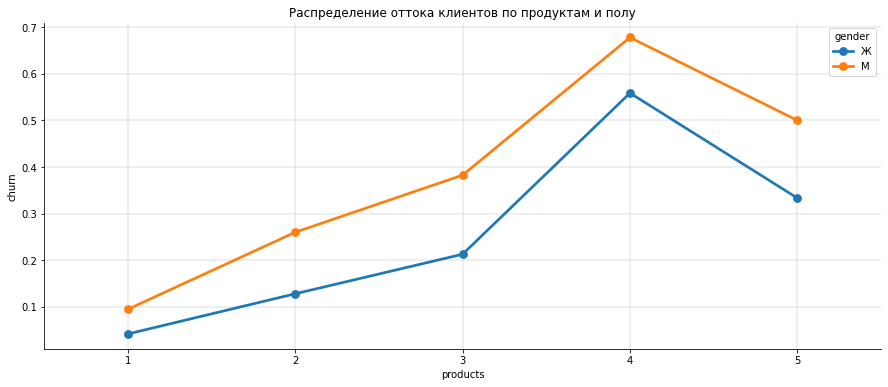

In [94]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.despine(left=False, ax=ax)
sns.pointplot(data=df.loc[df["products"]!=0], 
             x="products", y="churn", hue="gender", ax=ax, errorbar=None)
ax.grid( color='grey', lw=0.25)
ax.set_title("Распределение оттока клиентов по продуктам и полу"); 

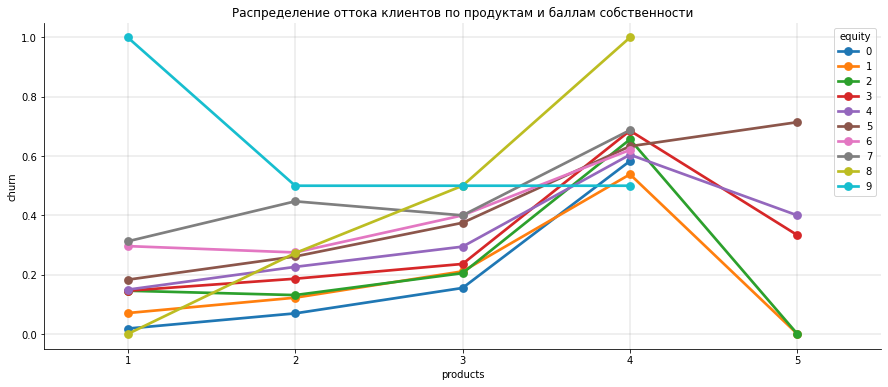

In [95]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.despine(left=False, ax=ax)
sns.pointplot(data=df.loc[df["products"]!=0], 
             x="products", y="churn", hue="equity", ax=ax, errorbar=None, palette='tab10')
ax.grid( color='grey', lw=0.25)
ax.set_title("Распределение оттока клиентов по продуктам и баллам собственности"); 

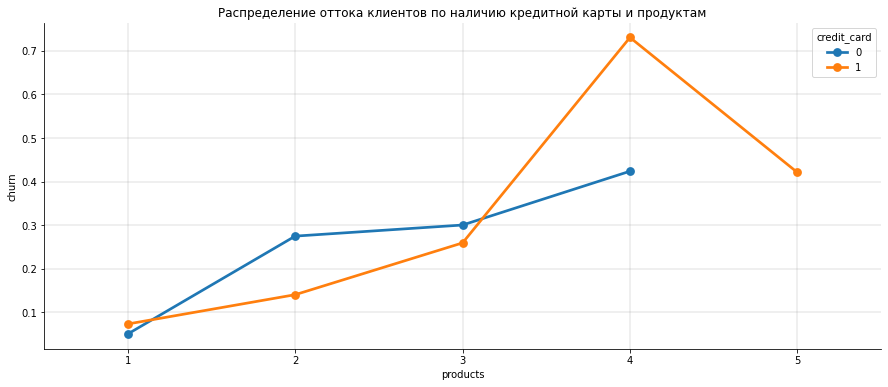

In [96]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.despine(left=False, ax=ax)
sns.pointplot(data=df.loc[df["products"]!=0], 
             x="products", y="churn", hue="credit_card", ax=ax, errorbar=None)
ax.grid( color='grey', lw=0.25)
ax.set_title("Распределение оттока клиентов по наличию кредитной карты и продуктам"); 

Как видим на графиках есть стойкая тенеденция к росту оттока клиентов с ростом числа продуктов

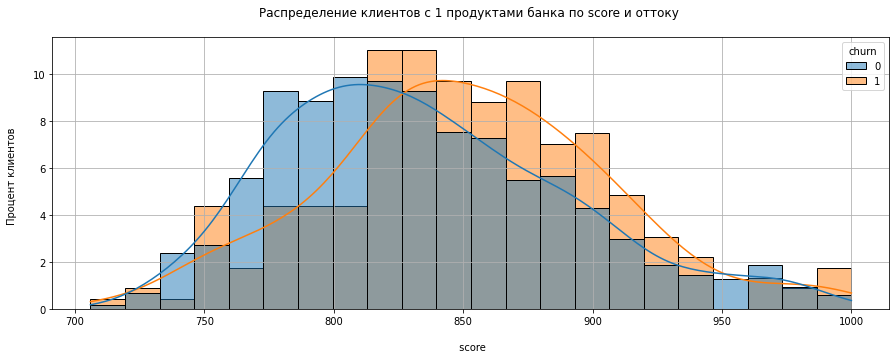

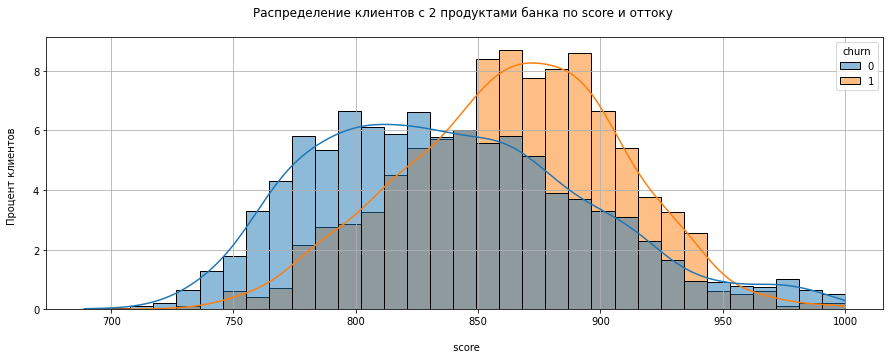

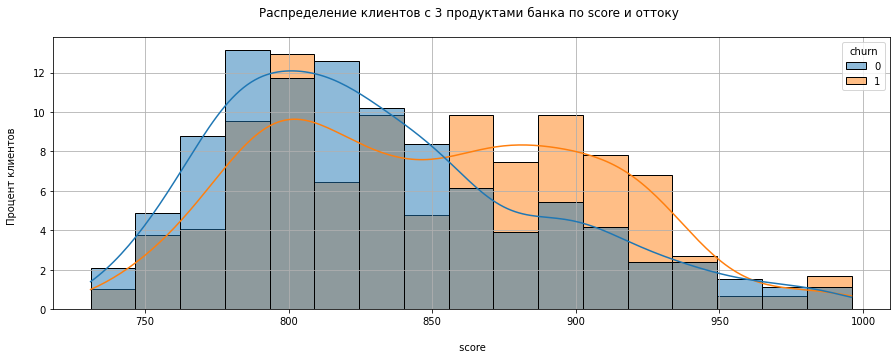

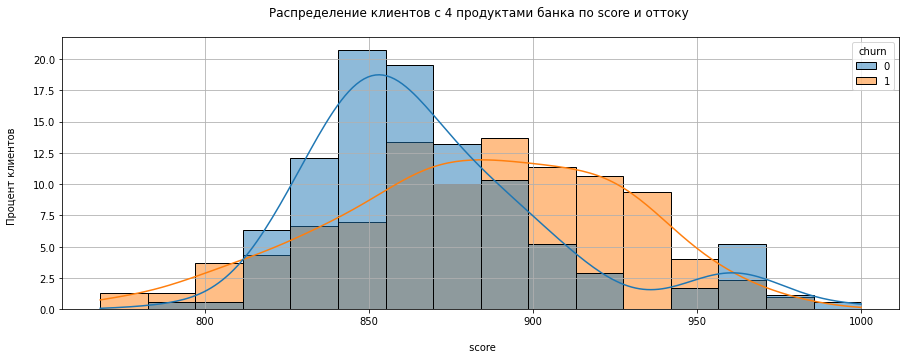

In [98]:
arr = [product_1, product_2, product_3, product_4]
for i in range(0, 4):
    plt.figure(figsize=(15,5))
    plt.grid(True)
    sns.histplot(data=arr[i], 
                 x='score', 
                 kde=True, 
                 hue='churn', 
                 stat='percent', 
                 common_norm=False)
    plt.title(f'Распределение клиентов с {i+1} продуктами банка по score и оттоку \n')
    plt.xlabel(f'\n score')
    plt.ylabel('Процент клиентов \n');

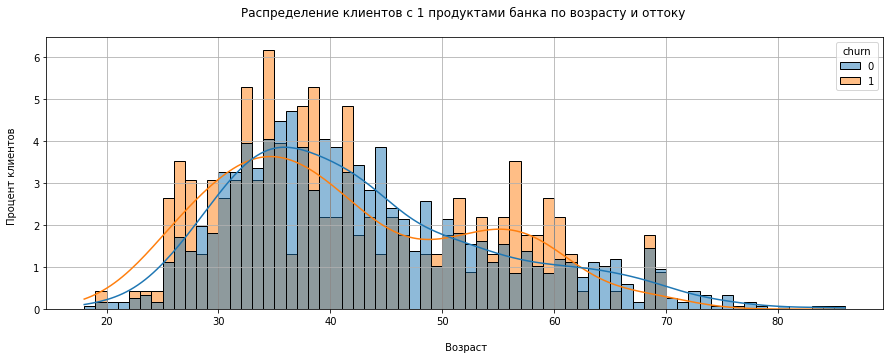

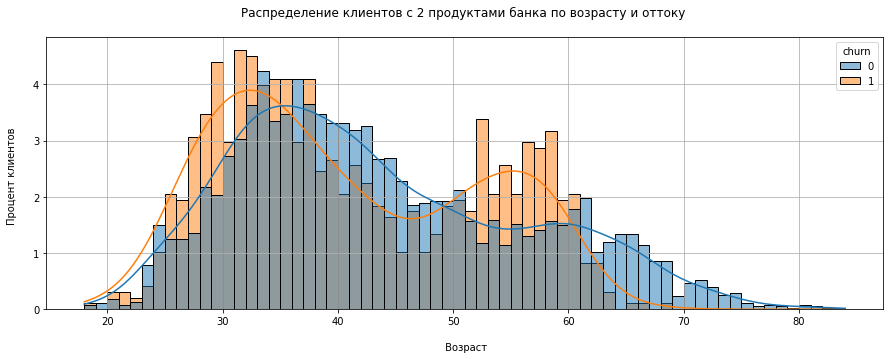

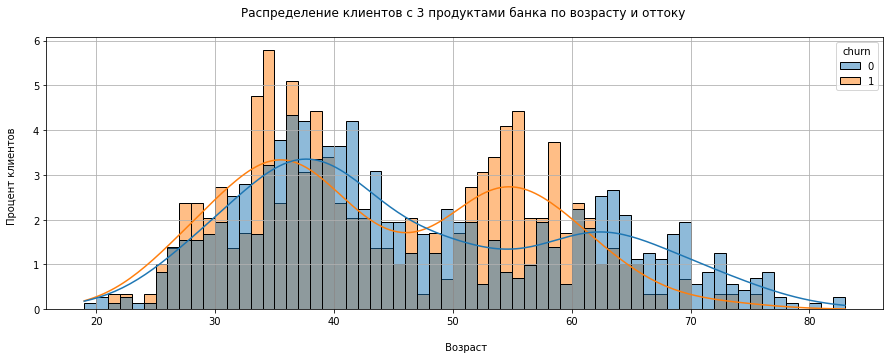

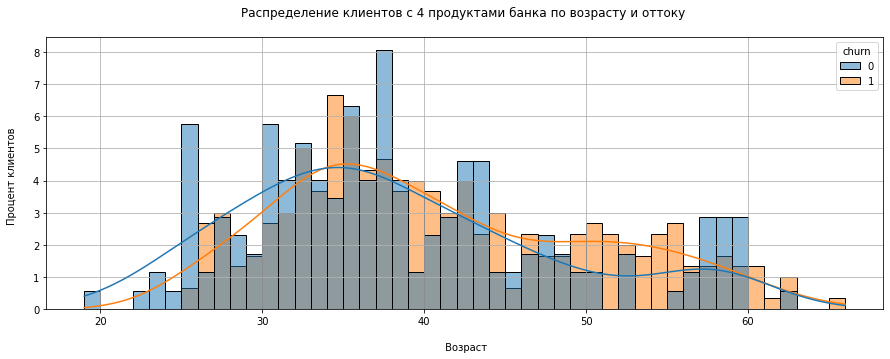

In [99]:
for i in range(0, 4):
    plt.figure(figsize=(15,5))
    plt.grid(True)
    sns.histplot(data=arr[i], 
                 x='age', 
                 kde=True, 
                 hue='churn', 
                 stat='percent', 
                 common_norm=False, bins=int(np.max(arr[i].age) - np.min(arr[i].age)))
    plt.title(f'Распределение клиентов с {i+1} продуктами банка по возрасту и оттоку \n')
    plt.xlabel(f'\n Возраст')
    plt.ylabel('Процент клиентов \n');

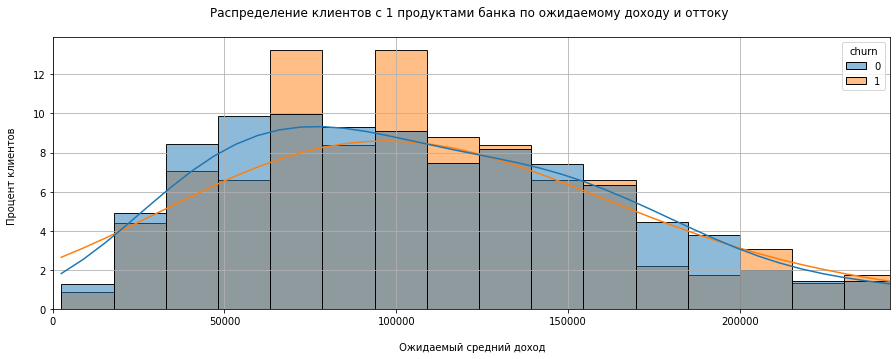

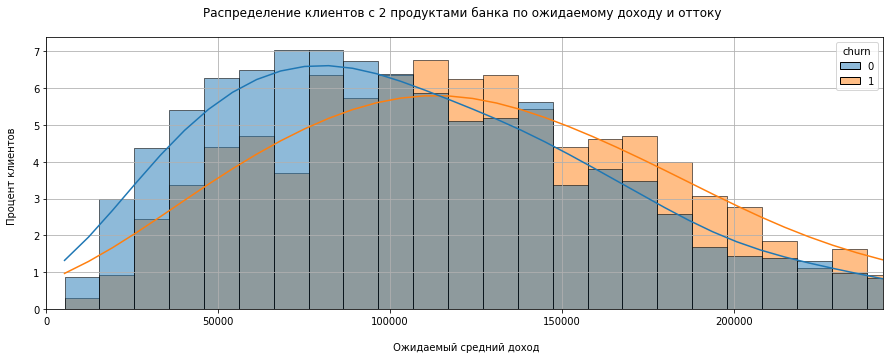

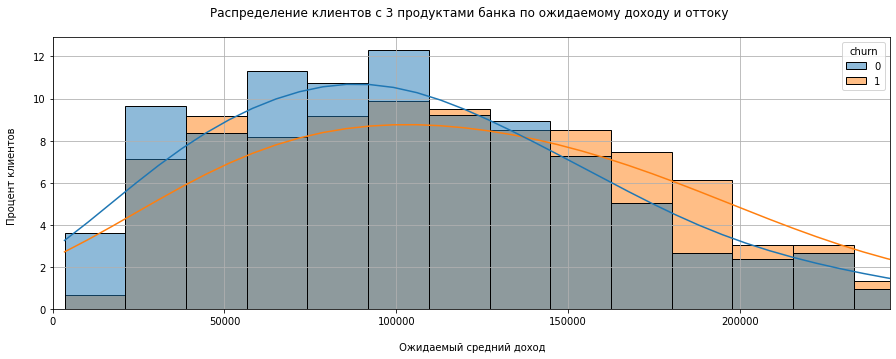

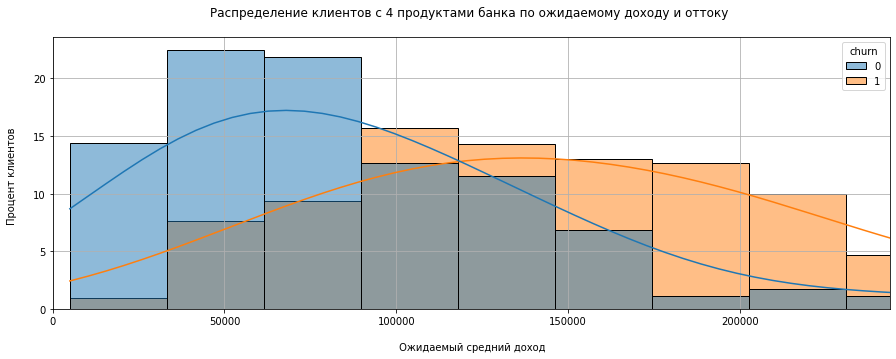

In [100]:
arr = [product_1, product_2, product_3, product_4]
for i in range(0, 4):
    plt.figure(figsize=(15,5))
    plt.grid(True)
    sns.histplot(data=arr[i], x='est_salary', kde=True, hue='churn', stat='percent', common_norm=False)
    plt.title(f'Распределение клиентов с {i+1} продуктами банка по ожидаемому доходу и оттоку \n')
    plt.xlabel('\n Ожидаемый средний доход')
    plt.ylabel('Процент клиентов \n')
    plt.xlim([0, np.percentile(product_1['est_salary'], 95)]);

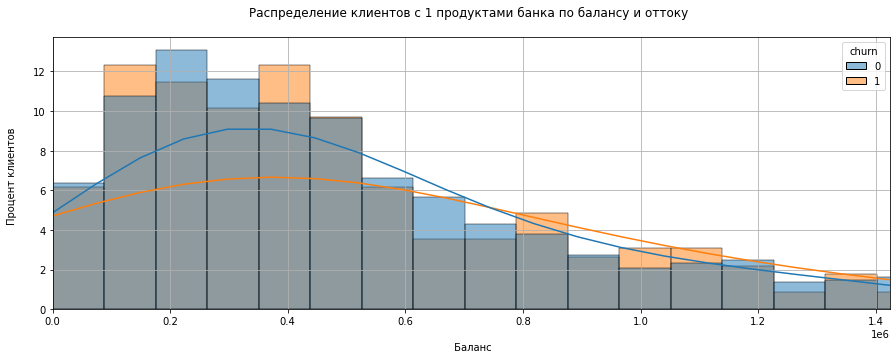

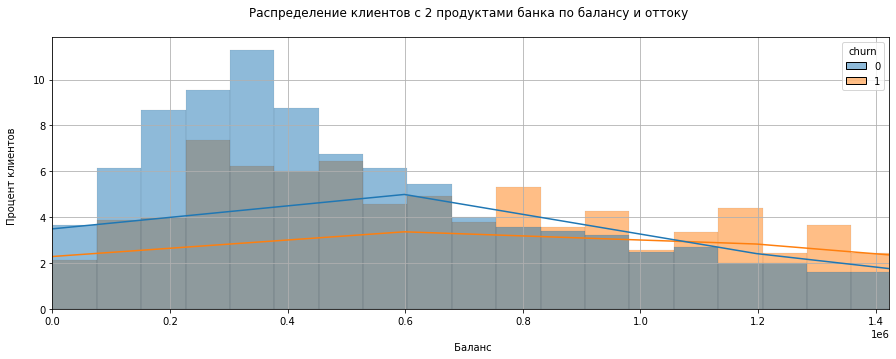

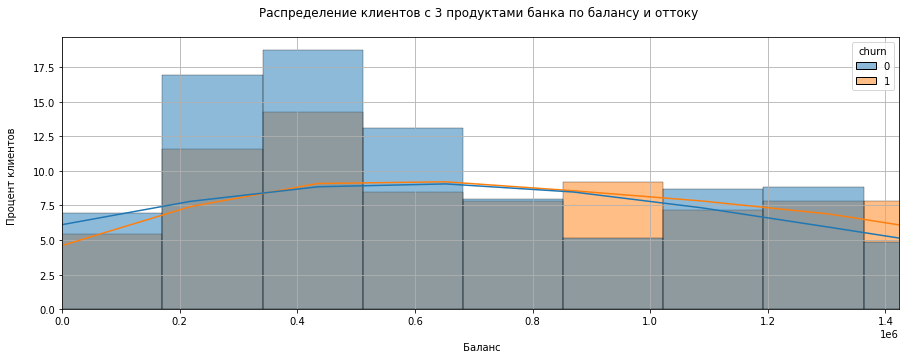

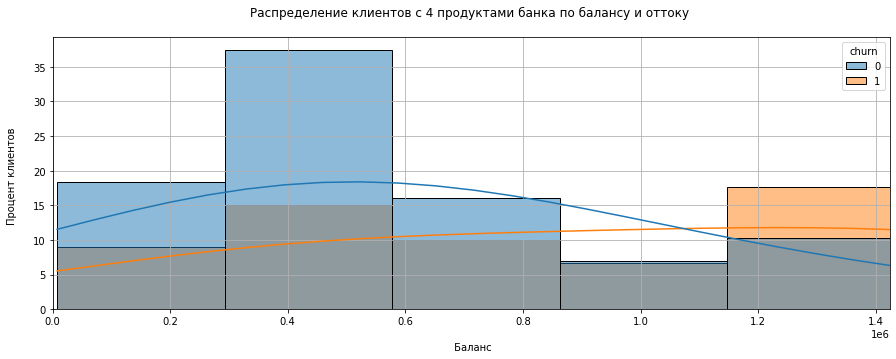

In [101]:
for i in range(0, 4):
    plt.figure(figsize=(15,5))
    plt.grid(True)
    sns.histplot(data=arr[i], x='balance', kde=True, hue='churn', stat='percent', common_norm=False)
    plt.title(f'Распределение клиентов с {i+1} продуктами банка по балансу и оттоку \n')
    plt.xlabel('\n Баланс')
    plt.ylabel('Процент клиентов \n')
    plt.xlim([0, np.percentile(product_1['balance'], 95)]);

## Приоритетные сегменты:

Сегмент клиентов 1: мужчины, с 3-5 баллами собственности, без кредитной карты, с 820+ баллами кредитного рейтнига, в возрасте от 20 до 39 и от 52 до 62

Сегмент клиентов 2: мужчины с доходом от 110 тысяч и балансом от 1 млн 

Сегмент клиентов 3: клиенты с 4 и более продуктами банка

In [102]:
query = (
'3<= equity <= 5 & ' + \
'(20 <= age <= 39 | 52 <= age <= 62) & ' + \
'score >= 820 & ' + \
'credit_card == 0'
)

segment_1 = df.query(query)
segment_1.shape[0]

988

In [103]:
segment_1.churn.mean()

0.4817813765182186

In [104]:
segment_1.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_balance_null,is_Рыбинск,is_Ярославль,is_Ростов,is_male,is_female
count,988.000000,988.000000,988.000000,988.000000,9.880000e+02,988.000000,988.0,988.000000,9.880000e+02,988.000000,988.0,988.000000,988.000000,988.000000,988.000000,988.000000
mean,4966.342105,882.793522,40.729757,4.231781,1.359692e+06,2.368421,0.0,0.600202,1.504403e+05,0.481781,0.0,0.303644,0.547571,0.148785,0.464575,0.535425
std,2876.066296,37.770864,12.032750,0.770480,2.128641e+06,0.676644,0.0,0.490105,1.512641e+05,0.499921,0.0,0.460064,0.497984,0.356057,0.498996,0.498996
min,13.000000,820.000000,20.000000,3.000000,1.501721e+04,1.000000,0.0,0.000000,7.571800e+03,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2455.250000,853.000000,32.000000,4.000000,5.100302e+05,2.000000,0.0,0.000000,7.691131e+04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5038.500000,879.000000,36.000000,4.000000,9.068128e+05,2.000000,0.0,1.000000,1.175702e+05,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000
75%,7453.500000,909.000000,54.000000,5.000000,1.455319e+06,3.000000,0.0,1.000000,1.713290e+05,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000
max,9999.000000,1000.000000,62.000000,5.000000,4.327710e+07,4.000000,0.0,1.000000,1.395064e+06,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [105]:
segment_2 = df.query('balance >= 1000000 and est_salary > 110000 and gender == "М"')
segment_2.shape[0]

752

In [106]:
segment_2.churn.mean()

0.5106382978723404

In [107]:
segment_2.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_balance_null,is_Рыбинск,is_Ярославль,is_Ростов,is_male,is_female
count,752.000000,752.000000,750.000000,752.000000,7.520000e+02,752.000000,752.000000,752.000000,7.520000e+02,752.000000,752.0,752.000000,752.000000,752.000000,752.0,752.0
mean,5091.714096,888.175532,41.790667,4.220745,2.463832e+06,2.351064,0.537234,0.521277,2.405051e+05,0.510638,0.0,0.235372,0.648936,0.115691,1.0,0.0
std,2894.807678,51.517283,9.010314,1.112426,4.942249e+06,0.882829,0.498944,0.499880,1.932940e+05,0.500220,0.0,0.424514,0.477621,0.320067,0.0,0.0
min,8.000000,731.000000,23.000000,0.000000,1.000412e+06,1.000000,0.000000,0.000000,1.107957e+05,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.0
25%,2590.750000,857.000000,35.000000,4.000000,1.235012e+06,2.000000,0.000000,0.000000,1.443323e+05,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.0
50%,5180.500000,896.000000,40.000000,4.000000,1.517723e+06,2.000000,1.000000,1.000000,1.832754e+05,1.000000,0.0,0.000000,1.000000,0.000000,1.0,0.0
75%,7611.250000,923.250000,48.000000,5.000000,2.443435e+06,3.000000,1.000000,1.000000,2.382689e+05,1.000000,0.0,0.000000,1.000000,0.000000,1.0,0.0
max,9977.000000,1000.000000,69.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,0.0,1.000000,1.000000,1.000000,1.0,0.0


In [108]:
query = (
'products >= 4'
)

segment_3 = df.query(query)
segment_3.shape[0]

493

In [109]:
segment_3.churn.mean()

0.6247464503042597

In [111]:
segment_3.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_balance_null,is_Рыбинск,is_Ярославль,is_Ростов,is_male,is_female
count,493.000000,493.000000,493.000000,493.000000,4.930000e+02,493.00000,493.000000,493.000000,4.930000e+02,493.000000,493.0,493.000000,493.000000,493.000000,493.000000,493.000000
mean,4975.383367,877.535497,39.655172,4.133874,1.242506e+06,4.03854,0.693712,0.793103,1.475504e+05,0.624746,0.0,0.202840,0.651116,0.146045,0.618661,0.381339
std,2937.350680,41.904426,9.616358,1.457504,1.308568e+06,0.19269,0.461419,0.405492,1.269900e+05,0.484680,0.0,0.402523,0.477101,0.353510,0.486209,0.486209
min,76.000000,768.000000,19.000000,0.000000,7.703050e+03,4.00000,0.000000,0.000000,5.043140e+03,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2458.000000,848.000000,33.000000,3.000000,4.436390e+05,4.00000,0.000000,1.000000,7.431216e+04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4909.000000,873.000000,37.000000,4.000000,9.273007e+05,4.00000,1.000000,1.000000,1.223635e+05,1.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000
75%,7533.000000,908.000000,46.000000,5.000000,1.569354e+06,4.00000,1.000000,1.000000,1.854375e+05,1.000000,0.0,0.000000,1.000000,0.000000,1.000000,1.000000
max,9999.000000,1000.000000,66.000000,9.000000,1.282976e+07,5.00000,1.000000,1.000000,1.048773e+06,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### Рекомендации по удержанию клиентов 

Для сегмента 1:

- предложить более выгодные условия кредитования под залог имущества
- выгодные условия для страхования имущества
- выгодные автокредиты
- кешбеки на категории товаров для мужчин при наличии дебетового счета

Для сегмента 2:

- более выгодные условия для накопительных счетов
- более выгодные условия для вкладов
- инвсетиционные продукты банка


Для сегмента 3:

- премиальные дебетовые карты
- депозиты со специальными условиями по снятию и начислению процентов с управлением онлайн
- накопительные счета с растущей ставкой
- дополнительные услуги банка (юридические услуги связанные с финансами, размещение средств за границей и т.п.)

### Выводы и рекомендации

__Данные:__ 

- данные загружены без ошибок
- есть пропуски в столбцах `age` и `balance`, явной связи со значениями в других колонках не прослеживается. Пропуски в этих столбцах могут быть либо по техническим причинам, либо из-за особенностей определенных банковских продуктов, которые не требуют этих данных
- пропуски оставлены как есть, без замены и удаления
- полных дублей в данных нет 
- есть неполные дубликаты по столбцу `userid`, но данные в остальных колонках никак не совпадают. По отдельным записям видно, что города у пользователей с одинаковым id всегда разные. Вероятно, базы данных филиалов не связанны друг с другом.
- в датасете есть один интересный клиент с 0 продуктов банка

__Выводы по результатам исследований:__

Портрет типичного пользователя выглядит следующим образом:
- имеет рейтинг от 750 до 950
- является жителем Ярославля
- в возрасте от 25 до 65
- имеет от 0 до 5 баллов собственности
- держит на счету от 250 тысяч до 1 миллиона
- пользуется одним или двумя продуктами банка
- имеет кредитную карту
- имеет среднюю заработную плату от 75 до 175 тысяч

Чаще всего банк покидают пользователи:
- мужского пола
- с 6 и более баллами собственности
- с 4 продуктами банка
- не имеющие кредитной карты
- активные в течение последнего месяца
- в возрасте от 26 до 36 и от 50 до 61 включительно
- с балансом свыше 1 млн
- со средней зарплатой от 100 до 220 тысяч
- с рейтингом от 830 до 930

Результаты корреляционного анализа:
- самая сильная корреляция между признаком отсуствующего баланса и `equity`(0.98). Как мы видели и ранее на графиках, этот признак чаще встерчается у клиентов с 0 или 1 баллом собственности. 
- далее идет корреляция признака отсутствующего баланса с `products` (0.79), `score` (0.76). Опять же, как видели ранее на графиках, чаще пропуск в балансе встречается у клиентов с 1 или 2 продуктами и у клиентов с либо невысоким, либо очень высоким рейтингом 
- средняя корреляция между `equity` и `score` (0.53). Вероятно, `score` рассчитывается в том числе и с учетом `equity`
- `score` также ожидаемо коррелирует со ожидаемой средней заработной платой `est_salary` (0.4)
- `equity` коррелирует с `products` (0.44). Похоже, клиенты с большим количеством объектов собственности пользуются большим количеством продуктов
- помимо `equity`,  `products` коррелирует с кредитным рейтингом `score`(0.31) и наличием кредитной карты(0.46) 
- также наблюдается слабая корреляция `equity` с `churn` (0.35). Ранее на графиках мы явно наблюдали, как с увеличением числа объектов собственности увеличивался отток
- наиболее сильно отток `churn` коррелирует с `products` (0.44). Опять же, на графиках распределения выше, можно явно наблюдать как с увеличением числа продуктов увеличивается показатель оттока клиентов
- также показатель оттока`churn` слабо коррелирует с рейтингом `score` (0.23), с полом клиента (0.22), с возрастом (0.19), наличием кредитной карты (0.2), активность за последний месяц (0.26)  

__Сегментация клиентов:__

Сегмент клиентов 1: мужчины, с 3-5 баллами собственности, без кредитной карты, с 820+ баллами кредитного рейтнига, в возрасте от 20 до 39 и от 52 до 62

Сегмент клиентов 2: мужчины с доходом от 110 тысяч и балансом от 1 млн 

Сегмент клиентов 3: клиенты с 4 и более продуктами банка

__Рекомендации по удержанию клиентов__ 

Для сегмента 1:

- предложить более выгодные условия кредитования под залог имущества
- выгодные условия для страхования имущества
- выгодные автокредиты
- кешбеки на категории товаров для мужчин при наличии дебетового счета

Для сегмента 2:

- более выгодные условия для накопительных счетов
- более выгодные условия для вкладов
- инвсетиционные продукты банка

Для сегмента 3:

- премиальные дебетовые карты
- депозиты со специальными условиями по снятию и начислению процентов с управлением онлайн
- предоставление аналитики по рынкам ценных бумаг
- накопительные счета с растущей ставкой
- дополнительные услуги банка (юридические услуги связанные с финансами, размещение средств за границей и т.п.)

### Презентация

https://disk.yandex.ru/i/IIjBteCeH8zyjg